# Group 11: Phase 3 - Multi-Task Object Detection and Localization for Cats and Dogs (CaDoD)

## Team Members

Kangle Li, kl66@iu.edu <br>
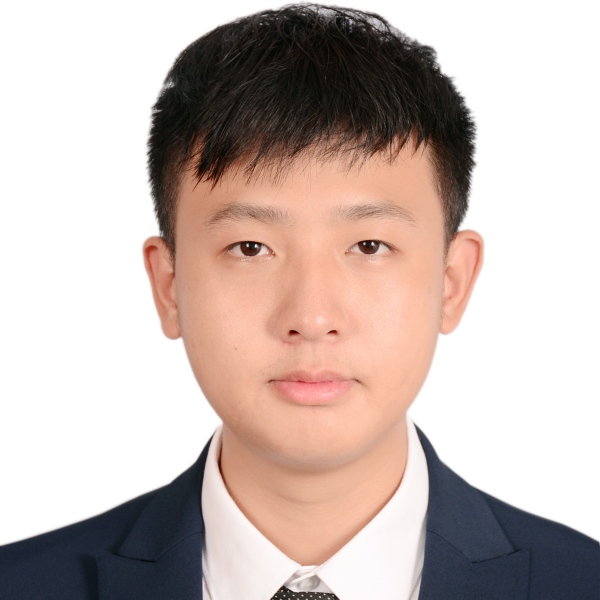

Genevieve Mortensen, gamorten@iu.edu <br>
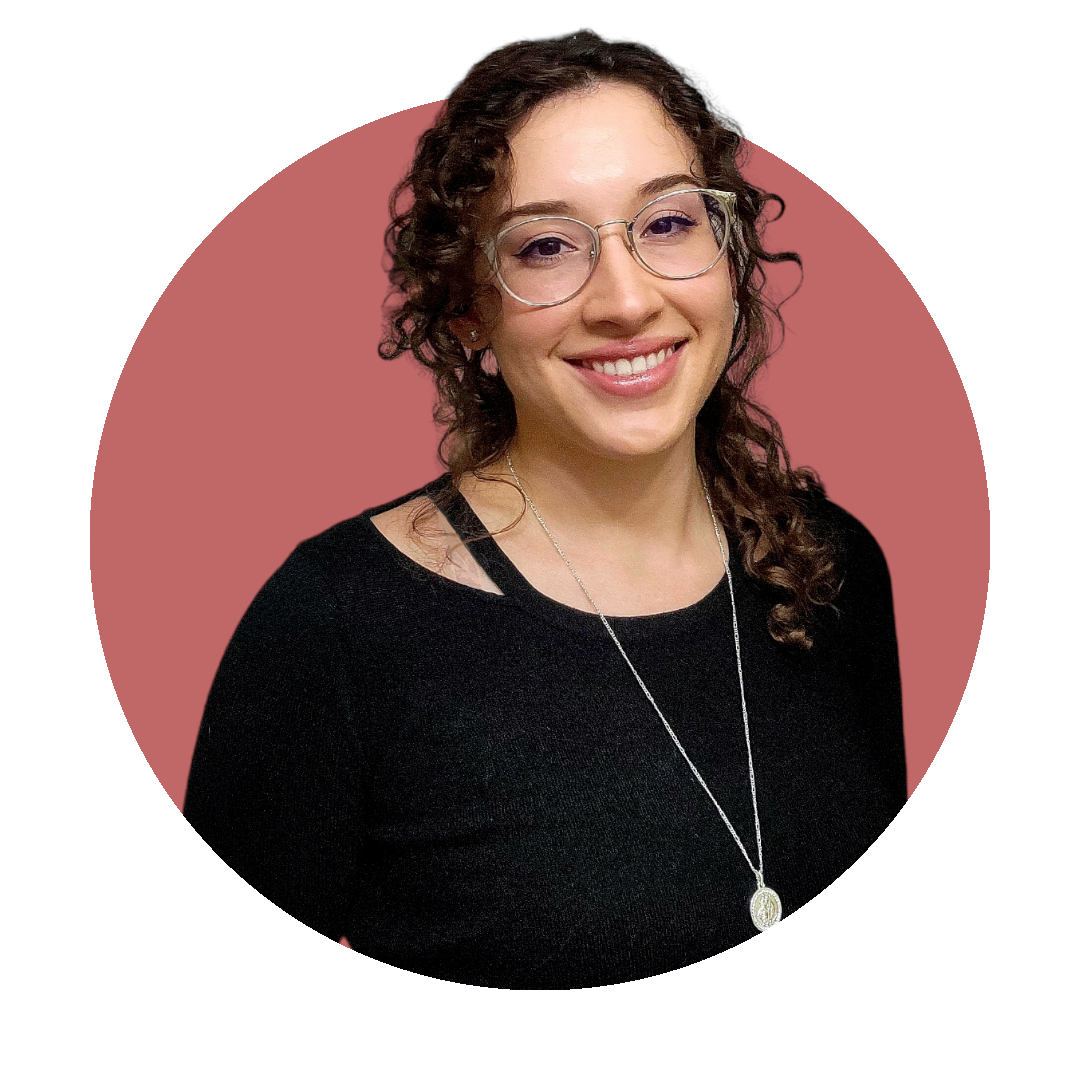

Sean Dixit, sedixit@iu.edu <br>
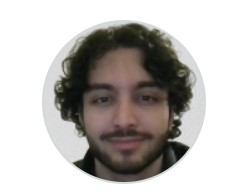

[Phase Leader Plan](https://docs.google.com/spreadsheets/d/1_yx1fk4EERuvBahTunbggOWZ7RtZmK8I5IZ6OzbBtX0/edit#gid=0) <br>
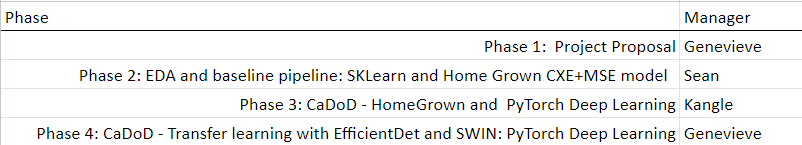

[Credit Assignment Plan](https://docs.google.com/spreadsheets/d/1_yx1fk4EERuvBahTunbggOWZ7RtZmK8I5IZ6OzbBtX0/edit#gid=0) <br>
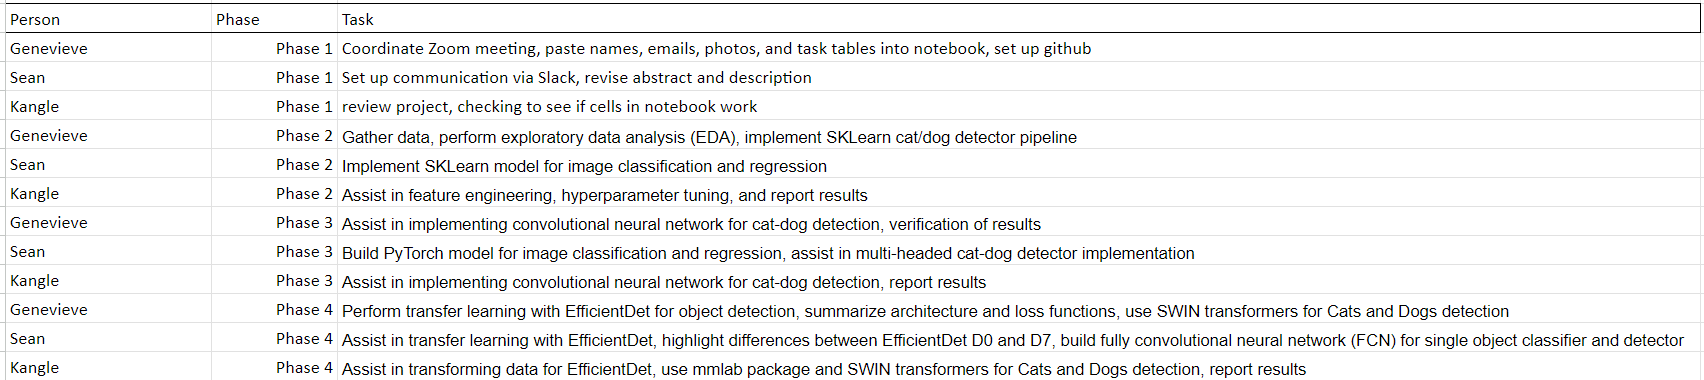

Gantt Diagram <br>
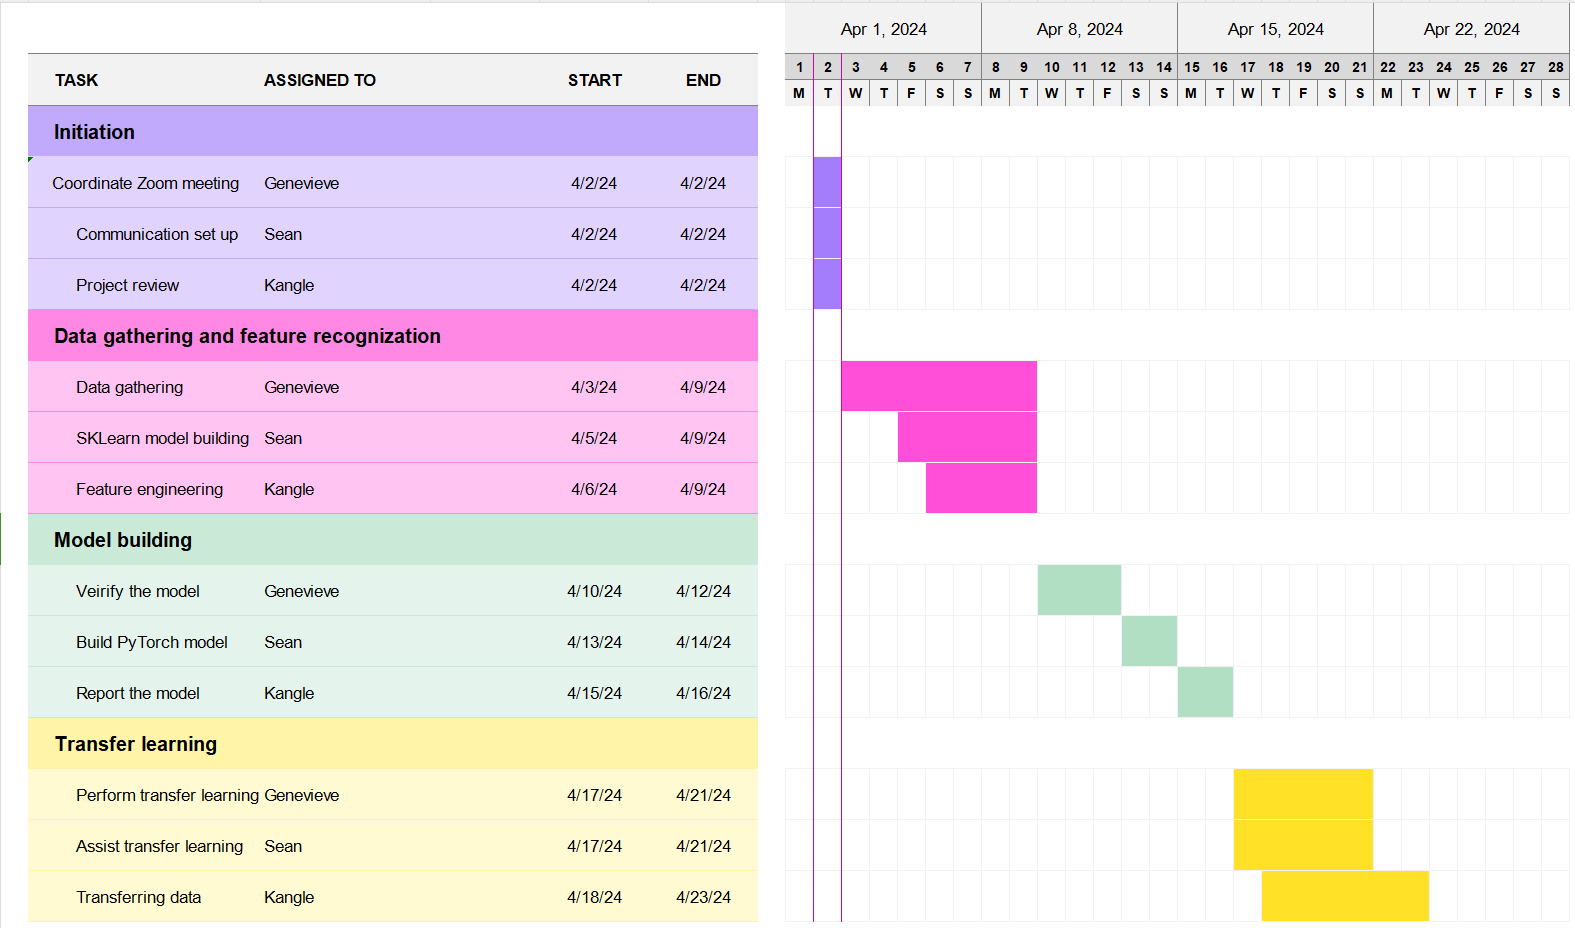

## Project Report

### Abstract

Our project involves the development of robust models for cat and dog detection using various techniques. We aim to enhance the accuracy and efficiency of identifying cats and dogs within images. In this phase, we aim to lay the groundwork for our project by establishing baseline pipelines using scikit-learn and homegrown models. 

In this phase, we first analyzed the images in our dataset by various means, including computing number of dog vs cat class images and plotting random images with bounding boxes. We then rescaled the images and created a baseline SGDClassifier model for classifying dog vs cat and a Linear Regression model for bounding box labelling. We used accuracy as our metric for performance for the classifier, and MSE as our metric for the linear regression model. We were able to acheieve a test accuracy of 62% (private, public: 59%) for the SGD classifier, and an MSE of 0.036 (private, public: 0.031) for the linear regression model. 


### Introduction
In our project, we take on the challenging task of classifying cat vs dog pictures and create bounding boxes around them. Our goal is to develop robust models capable of accurately identifying and localizing cats and dogs in images. The purpose of this project is create an end to end pipeline in machine learning to create an object detector for cats and dogs. There are about 13,000 images of varying shapes and aspect ratios. They are all RGB images and have bounding box coordinates stored in a .csv file. In order to create a detector, we will first have to preprocess the images to be all of the same shapes, take their RGB intensity values and flatten them from a 3D array to 2D. Then we will feed this array into a linear classifier and a linear regressor to predict labels and bounding boxes.

### Dataset
The dataset we've opted for is a subset of the Open Images Dataset V6, a comprehensive collection of labeled images spanning various categories.  It contains millions of labeled images spanning a wide variety of categories including cat and dog images, making it a valuable resource for training and evaluating object detection machine learning models. Our subset specifically focuses on images featuring cats and dogs as the primary subjects, with accompanying bounding box annotations indicating the precise location of each animal within the image. Our subset will have 12,866 images of dogs and cats. Each image is supplemented with metadata such as dimensions, file paths, and class labels, facilitating efficient model training and evaluation. The vastness of the dataset ensures a rich diversity of images capturing different breeds, poses, and environments, providing ample variation for robust model training.

We will be using a subset of the Open Images Dataset V6. It is a large-scale dataset curated by Google designed to facilitate computer vision research and development. It contains millions of labeled images spanning a wide variety of categories, making it a valuable resource for training and evaluating machine learning models. Our subset will have 12,866 images of dogs and cats.

The image archive `cadod.tar.gz` is a subset [Open Images V6](https://storage.googleapis.com/openimages/web/download.html). It contains a total of 12,966 images of dogs and cats.


Image bounding boxes are stored in the csv file `cadod.csv`. The following describes whats contained inside the csv.

* ImageID: the image this box lives in.
* Source: indicates how the box was made:
    * xclick are manually drawn boxes using the method presented in [1], were the annotators click on the four extreme points of the object. In V6 we release the actual 4 extreme points for all xclick boxes in train (13M), see below.
    * activemil are boxes produced using an enhanced version of the method [2]. These are human verified to be accurate at IoU>0.7.
* LabelName: the MID of the object class this box belongs to.
* Confidence: a dummy value, always 1.
* XMin, XMax, YMin, YMax: coordinates of the box, in normalized image coordinates. XMin is in [0,1], where 0 is the leftmost pixel, and 1 is the rightmost pixel in the image. Y coordinates go from the top pixel (0) to the bottom pixel (1).
* XClick1X, XClick2X, XClick3X, XClick4X, XClick1Y, XClick2Y, XClick3Y, XClick4Y: normalized image coordinates (as XMin, etc.) of the four extreme points of the object that produced the box using [1] in the case of xclick boxes. Dummy values of -1 in the case of activemil boxes.

The attributes have the following definitions:

* IsOccluded: Indicates that the object is occluded by another object in the image.
* IsTruncated: Indicates that the object extends beyond the boundary of the image.
* IsGroupOf: Indicates that the box spans a group of objects (e.g., a bed of flowers or a crowd of people). We asked annotators to use this tag for cases with more than 5 instances which are heavily occluding each other and are physically touching.
* IsDepiction: Indicates that the object is a depiction (e.g., a cartoon or drawing of the object, not a real physical instance).
* IsInside: Indicates a picture taken from the inside of the object (e.g., a car interior or inside of a building).
For each of them, value 1 indicates present, 0 not present, and -1 unknown.

### Pipelines

#### Stochastic Gradient Descent Classifier (SGDC) as Baseline

Before delving into our custom implementations, it's important to establish the Stochastic Gradient Descent Classifier (SGDC) as our baseline model. SGDC, a linear regressor widely used for classification tasks, offers a robust point of comparison for our more specialized models. Its efficiency and simplicity make SGDC an excellent linear regression baseline for large data, against which the performance and complexity of our homegrown models can be evaluated.

#### Multi-Output Linear Regression

Linear Regression is a fundamental algorithm in machine learning for predicting continuous values. In our custom model, we extend this concept to predict multiple outputs at once, targeting scenarios where we need to predict four related values, such as the coordinates of a bounding box in an image (x, y, width, height). This extension aims to improve upon the baseline by offering predictions that are not just categorical but spatially informative as well.

#### Multi-Task Logistic Regression

Similarly, Logistic Regression, typically used for binary classification tasks like Cats vs Dogs, is extended in our custom model to perform multi-task learning. This model is not only tasked with classifying input data into categories but also with predicting additional continuous values, such as bounding box coordinates. This approach seeks to provide a more comprehensive understanding of the input data, surpassing the baseline SGDC's capabilities by adding a layer of regression to the classification task.

### EDA
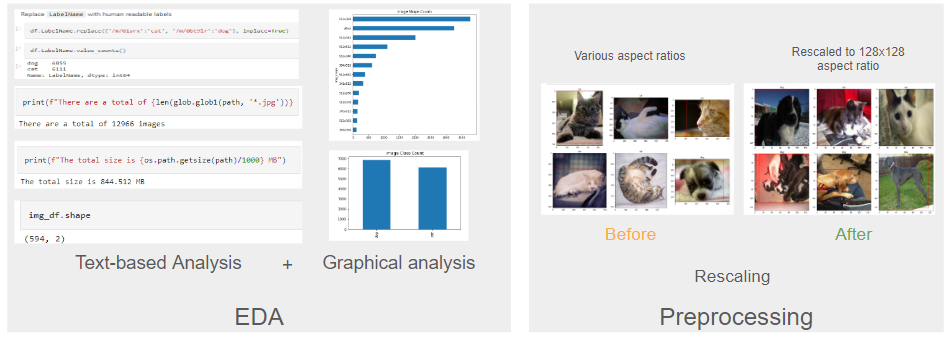

In this phase, we first analyzed the images in our dataset (i.e a subset of the Open Images Dataset V6) by various means, including computing the number of images, shape of the images dataframe, number of dog vs cat class images, size of the dataset and number of image aspect ratio types. We also changed the label names to human readable labels.

Upon analysis of the dataset, we found that it contains 12966 images in total (of dogs and cats), with a total size of 844.512 MB. The number of dog images outweighed the number of cat images, as there were 6855 dog images and 6111 cat images. We also plotted the different aspect ratios of images in the dataset as there were many different types of aspect ratios present in the dataset. We found that the most common aspect ratio was 512x384. We filtered image shapes with count less than 100 into a separate category called other to simplify the processing. 

We then plotted 6 random images using matplotlib along with their corresponding bounding boxes. We rescaled the images to 128x128 aspect ratio to standardize the images and save space/time for storing and processing.  

Before resizing: (notice how they are rectangular) <br>
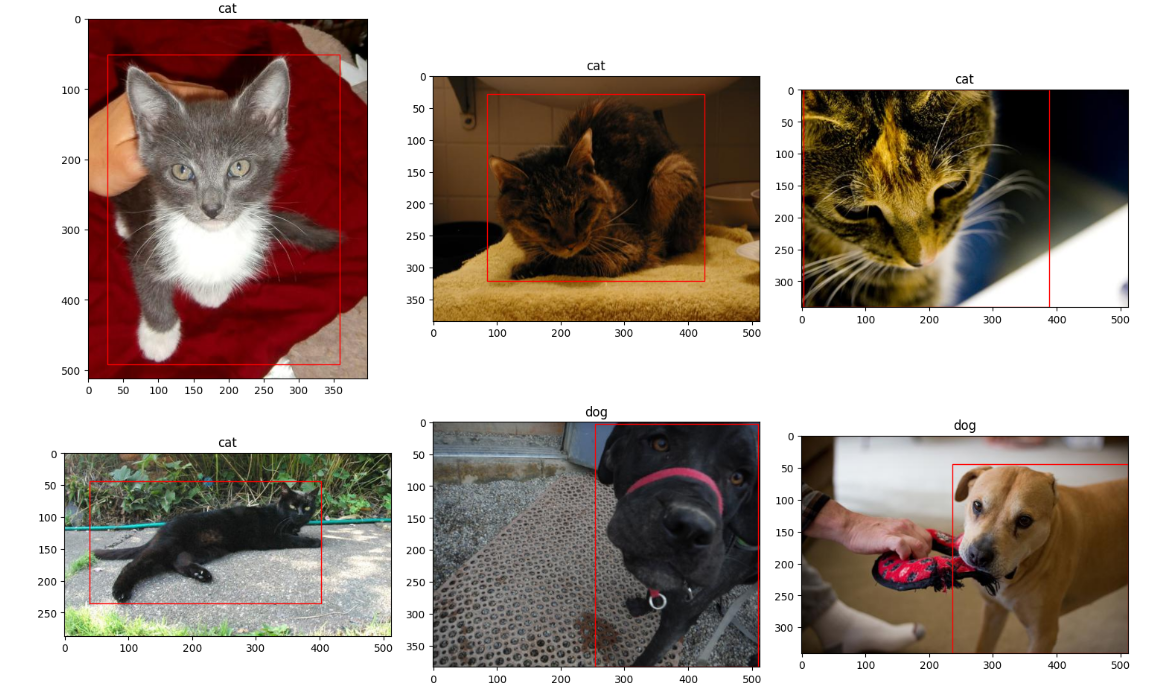

After resizing to 128x128 aspect ratio: <br>
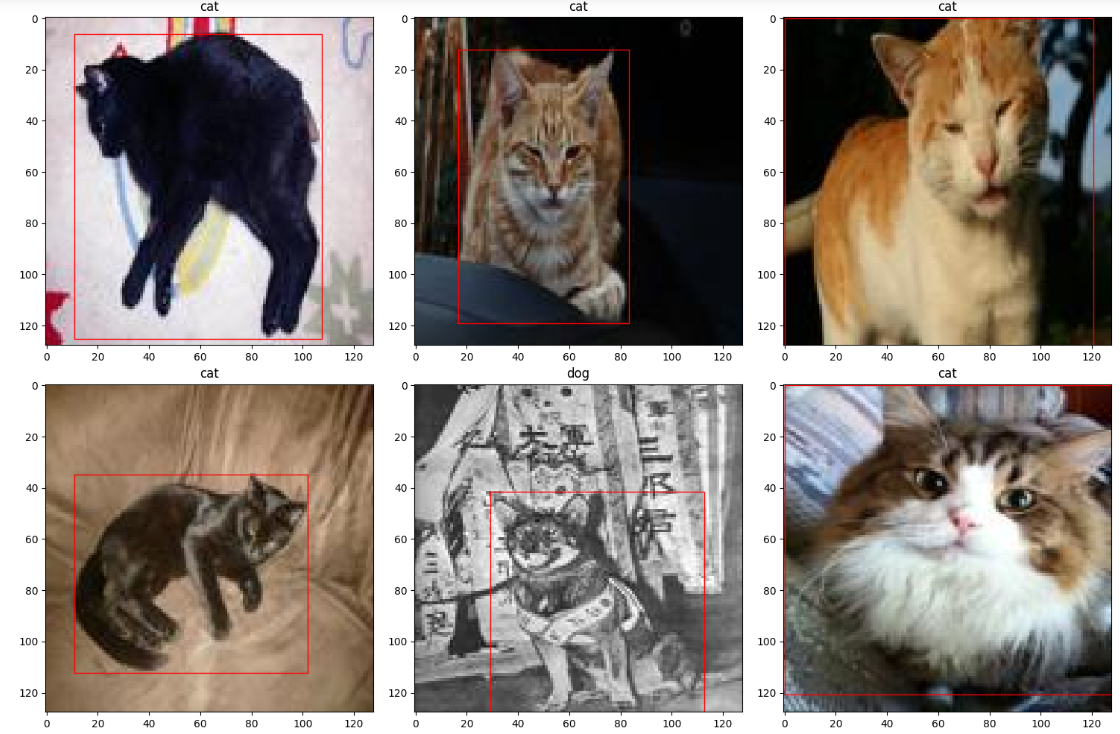


### Experiments
Project Workflow Block Diagram <br>
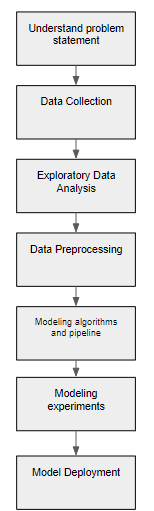

Images were preprocessed by resizing them to a standard resolution of 128x128 pixels. This resizing ensured uniformity in image dimensions across the dataset and facilitated efficient processing during model training and evaluation. The input image size for all experiments was standardized to 128x128 pixels.


#### Metrics

##### Performance Metric: Accuracy

For the classifier machine learning pipelines, we evaluate performance primarily through the metric of accuracy. Accuracy is defined as the proportion of true results (both true positives and true negatives) among the total number of cases examined. Mathematically, it is expressed as:

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$

where:
- $TP$ = True Positives
- $TN$ = True Negatives
- $FP$ = False Positives
- $FN$ = False Negatives

Accuracy provides a straightforward measure of how well our model correctly identifies or predicts the target variable.

##### SGD Classifier Pipeline: Utilizing MSE

For our Stochastic Gradient Descent Classifier (SGDC) pipeline, we employ the Mean Squared Error (MSE) as a specific performance metric. MSE measures the average squared difference between the estimated values and the actual value, offering insight into the precision of continuous value prediction within our classification process. MSE is given by:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

where:
- $n$ is the number of samples,
- $y_i$ is the actual value of the $i^{th}$ sample,
- $\hat{y}_i$ is the predicted value for the $i^{th}$ sample.

This formula allows us to quantify the deviation of the predicted continuous values from their actual values, thus offering a nuanced understanding of the model's predictive accuracy, especially in tasks where precision in the continuous output space is crucial.

##### Multi-Output Linear Regression Loss Function: Mean Squared Error (MSE)

The Mean Squared Error (MSE) is a common loss function used in regression, measuring the average squared difference between estimated values and the actual value. For a multi-output scenario, the MSE is calculated for each target independently and then averaged. The equation for MSE when extending to four targets is given by:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{1}{4} \sum_{j=1}^{4} (y_{ij} - \hat{y}_{ij})^2 \right) $$

where $n$ is the number of samples, $y_{ij}$ is the actual value for the $j^{th}$ target of the $i^{th}$ sample, and $\hat{y}_{ij}$ is the predicted value for the $j^{th}$ target of the $i^{th}$ sample.

##### Loss Function: Cross-Entropy + Mean Squared Error

To accommodate the dual objectives of classification and regression, we combine the Cross-Entropy (CXE) loss for the classification task with the Mean Squared Error (MSE) loss for the regression task. The total loss is a weighted sum of these two losses:

$$ Total Loss = \lambda \cdot CXE + (1 - \lambda) \cdot MSE $$

where $\lambda$ is a hyperparameter that balances the contribution of each loss component.

#### Results
Our experimental baseline models are as follows: <br>
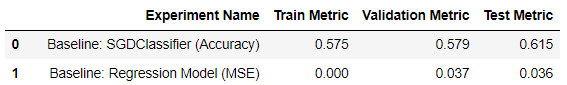

NOTE: we used the same family of input features for both, i.e all of the features in the dataset.

### Discussion
Our decision-making process involved several key considerations aimed at laying the groundwork for our project. We opted for a subset of the Open Images Dataset V6, focusing specifically on images featuring cats and dogs. This dataset choice provided a diverse collection of annotated images, essential for training robust object detection models. EDA was conducted to gain insights into the dataset's characteristics, such as image distribution, class balance, and aspect ratios. This analysis guided our preprocessing steps and model selection. For preprocessing, we resized the images to a standard resolution of 128x128 pixels, which was essential for standardizing inputs across different models and reducing computational overhead during training and inference. We employed scikit-learn's SGDClassifier for image classification and a Linear Regression model for bounding box labeling as baseline models. These choices were made considering their simplicity and suitability for initial experimentation. The metrics chosen for evaluation, namely accuracy for image classification and mean squared error (MSE) for bounding box regression, were selected as they are both widely used for their respective tasks and they are relatively simple to implement and understand. 

Firstly, the SGDClassifier achieved a test accuracy of 62%. This indicates that our classifier is moderately successful in distinguishing between images containing cats and dogs. While 62% accuracy may seem modest, it serves as a promising starting point for further refinement and improvement. Analyzing the misclassifications and exploring methods to address them, such as data augmentation or fine-tuning hyperparameters, could potentially enhance the classifier's accuracy in subsequent iterations.

Secondly, the Linear Regression model yielded an MSE of 0.036 for bounding box labeling. This metric reflects the precision of our model in predicting the coordinates of bounding boxes around detected objects. A lower MSE suggests that our model is proficient in estimating the spatial location of cats and dogs within images. We visualized the predicted bounding boxes overlaid on images, which can provide additional insights into the model's performance. 

Our initial results demonstrate the feasibility of using machine learning techniques for cat and dog classification/detection. While there is room for improvement, our baseline models show promise and provide a solid foundation for further experimentation and refinement. It would be interesting to see how the homegrown logistic regression model if we were able to implement it correctly.

### Conclusion
Our project focuses on the development of robust models for cat and dog detection (CaDoD), aiming to accurately classify images containing these animals and precisely localize their bounding boxes. This task holds significant importance in various real-world applications, including wildlife conservation, pet monitoring, and security surveillance.

Our hypothesis posited that machine learning pipelines with custom features can effectively accomplish the task of cat and dog detection and classification. Throughout the project, we conducted thorough exploratory data analysis, implemented baseline models using scikit-learn and custom approaches, and evaluated their performance using relevant metrics. Our results demonstrated promising performance, with our baseline models achieving competitive accuracy scores and MSE values.

The significance of our results lies in laying the groundwork for more advanced techniques and methodologies in subsequent project phases. Moving forward, we envision incorporating MLP models using Pytorch for image classifcation and regression along with deep learning models such as CNNs, EfficientNets and SWIN transformers and further refining our models to achieve higher accuracy in cat and dog detection/classification.

### Bibliography
None


In [1]:
from collections import Counter
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
import tarfile
from tqdm.notebook import tqdm
import warnings

# Import Data

### Unarchive data

In [2]:
def extract_tar(file, path):
    """
    function to extract tar.gz files to specified location
    
    Args:
        file (str): path where the file is located
        path (str): path where you want to extract
    """
    with tarfile.open(file) as tar:
        files_extracted = 0
        for member in tqdm(tar.getmembers()):
            if os.path.isfile(path + member.name[1:]):
                continue
            else:
                tar.extract(member, path)
                files_extracted += 1
        tar.close()
        if files_extracted < 3:
            print('Files already exist')

In [3]:
path = '../images'

In [4]:
extract_tar('cadod.tar.gz', path)

  0%|          | 0/25936 [00:00<?, ?it/s]

Files already exist


In [5]:
print(os.listdir())

['-p', '.ipynb_checkpoints', 'cadod.csv', 'cadod.tar.gz', 'CaDoD_Phase_2_baseline_SKLearn_homegrown.ipynb', 'data', 'Group11_Phase2 .ipynb', 'Group11_Phase3.ipynb', 'Group11_Phase3_1.ipynb', 'images', 'Shape_detector_via_EfficientDet', 'temp.txt']


### Load bounding box meta data

In [6]:
import pandas as pd
df = pd.read_csv('cadod.csv')

In [7]:
df.head()

ImageID  Source  LabelName  Confidence      XMin      XMax  \
0  0000b9fcba019d36  xclick  /m/0bt9lr           1  0.165000  0.903750   
1  0000cb13febe0138  xclick  /m/0bt9lr           1  0.000000  0.651875   
2  0005a9520eb22c19  xclick  /m/0bt9lr           1  0.094167  0.611667   
3  0006303f02219b07  xclick  /m/0bt9lr           1  0.000000  0.999219   
4  00064d23bf997652  xclick  /m/0bt9lr           1  0.240938  0.906183   

       YMin      YMax  IsOccluded  IsTruncated  ...  IsDepiction  IsInside  \
0  0.268333  0.998333           1            1  ...            0         0   
1  0.000000  0.999062           1            1  ...            0         0   
2  0.055626  0.998736           1            1  ...            0         0   
3  0.000000  0.998824           1            1  ...            0         0   
4  0.000000  0.694286           0            0  ...            0         0   

   XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  XClick3Y  \
0  0.636250  0.903750  0.748750  0.165000  0.268333  0.506667  0.998333   
1  0.312500  0.000000  0.317500  0.651875  0.000000  0.410882  0.999062   
2  0.487500  0.611667  0.243333  0.094167  0.055626  0.226296  0.998736   
3  0.508594  0.999219  0.000000  0.478906  0.000000  0.375294  0.720000   
4  0.678038  0.906183  0.240938  0.522388  0.000000  0.370000  0.424286   

   XClick4Y  
0  0.661667  
1  0.999062  
2  0.305942  
3  0.998824  
4  0.694286  

[5 rows x 21 columns]

# Exploratory Data Analysis

## Statistics

In [8]:
print(f"There are a total of {len(glob.glob1(path, '*.jpg'))} images")

There are a total of 12966 images


In [9]:
print(f"The total size is {os.path.getsize(path)/1000} MB")

The total size is 9437.184 MB


In [10]:
df.shape

(12966, 21)

Replace `LabelName` with human readable labels

In [11]:
df.LabelName.replace({'/m/01yrx':'cat', '/m/0bt9lr':'dog'}, inplace=True)

In [12]:
df.LabelName.value_counts()

LabelName
dog    6855
cat    6111
Name: count, dtype: int64

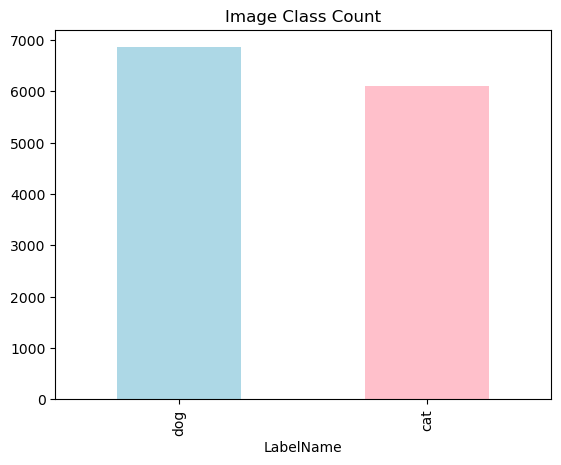

In [13]:
df.LabelName.value_counts().plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Image Class Count')
plt.show()

In [14]:
df.describe()

Confidence          XMin          XMax          YMin          YMax  \
count     12966.0  12966.000000  12966.000000  12966.000000  12966.000000   
mean          1.0      0.099437      0.901750      0.088877      0.945022   
std           0.0      0.113023      0.111468      0.097345      0.081500   
min           1.0      0.000000      0.408125      0.000000      0.451389   
25%           1.0      0.000000      0.830625      0.000000      0.910000   
50%           1.0      0.061250      0.941682      0.059695      0.996875   
75%           1.0      0.167500      0.998889      0.144853      0.999062   
max           1.0      0.592500      1.000000      0.587088      1.000000   

         IsOccluded   IsTruncated     IsGroupOf   IsDepiction      IsInside  \
count  12966.000000  12966.000000  12966.000000  12966.000000  12966.000000   
mean       0.464754      0.738470      0.013651      0.045427      0.001157   
std        0.499239      0.440011      0.118019      0.209354      0.040229   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           XClick1X      XClick2X      XClick3X      XClick4X      XClick1Y  \
count  12966.000000  12966.000000  12966.000000  12966.000000  12966.000000   
mean       0.390356      0.424582      0.494143      0.506689      0.275434   
std        0.358313      0.441751      0.405033      0.462281      0.415511   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%        0.221292      0.096875      0.285071      0.130000      0.024323   
50%        0.435625      0.415625      0.531919      0.623437      0.146319   
75%        0.609995      0.820000      0.787500      0.917529      0.561323   
max        0.999375      0.999375      1.000000      0.999375      0.999375   

           XClick2Y      XClick3Y      XClick4Y  
count  12966.000000  12966.000000  12966.000000  
mean       0.447448      0.641749      0.582910  
std        0.401580      0.448054      0.403454  
min       -1.000000     -1.000000     -1.000000  
25%        0.218333      0.405816      0.400000  
50%        0.480838      0.825000      0.646667  
75%        0.729069      0.998042      0.882500  
max        0.999375      1.000000      0.999375

## Sample of Images

C:\Users\postw\AppData\Local\Temp\ipykernel_23516\88787746.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[i].add_patch(plt.Rectangle((coords[0]*w, coords[2]*h),
C:\Users\postw\AppData\Local\Temp\ipykernel_23516\88787746.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coords[1]*w-coords[0]*w, coords[3]*h-coords[2]*h,


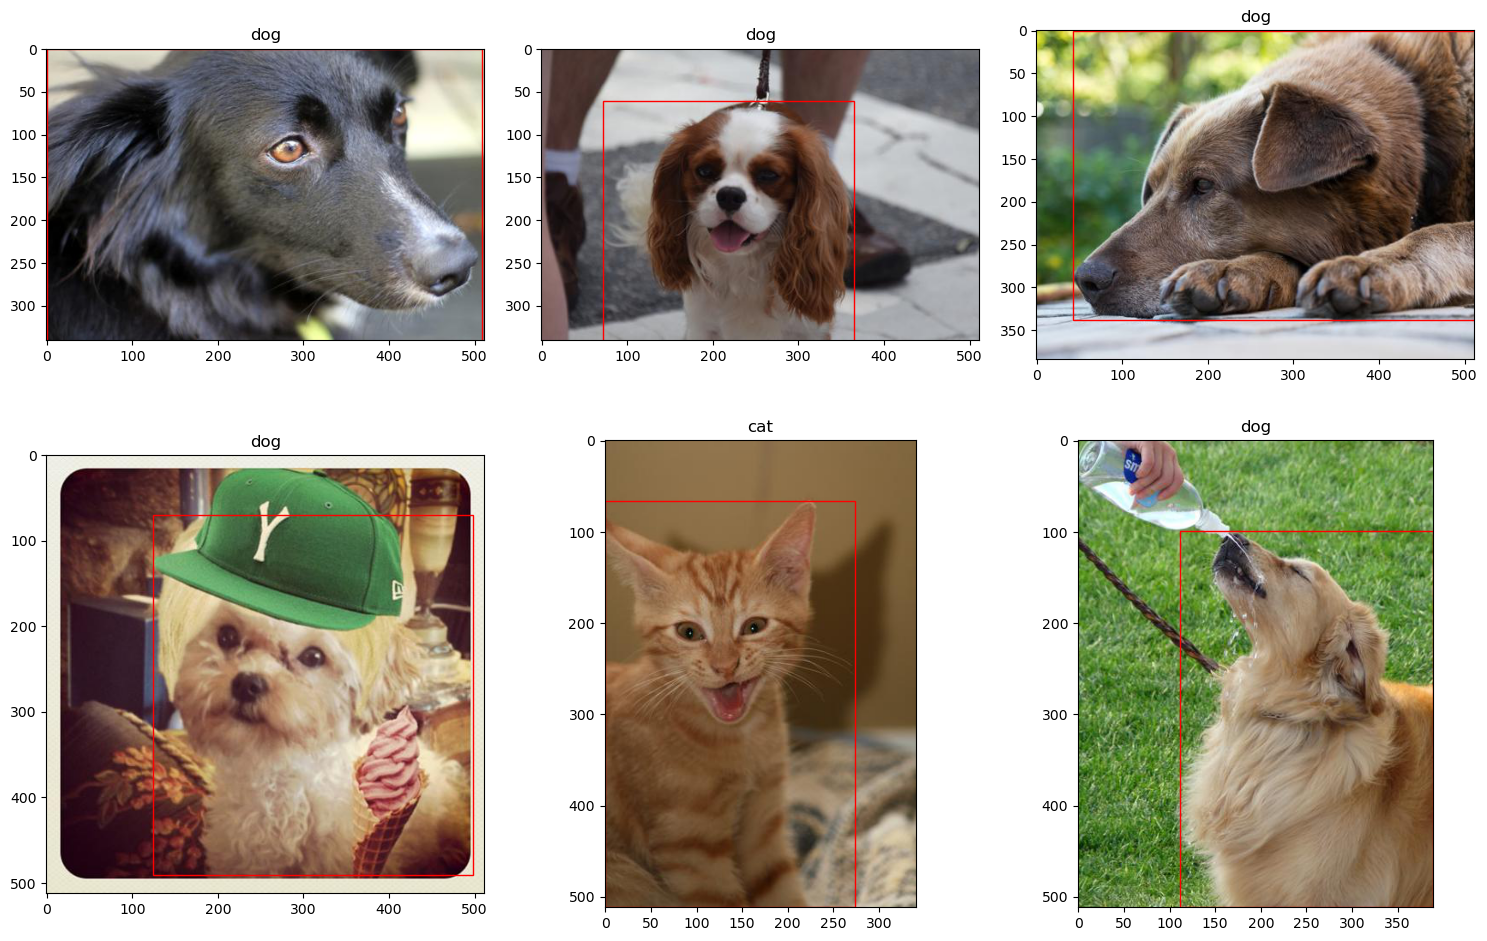

In [15]:
# plot random 6 images
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(np.random.choice(df.shape[0], size=6, replace=False)):
    img = mpimg.imread(path + '/' + df.ImageID.values[j] + '.jpg')
    h, w = img.shape[:2]
    coords = df.iloc[j,4:8]
    ax[i].imshow(img)
    ax[i].set_title(df.LabelName[j])
    ax[i].add_patch(plt.Rectangle((coords[0]*w, coords[2]*h), 
                                  coords[1]*w-coords[0]*w, coords[3]*h-coords[2]*h, 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

## Image shapes and sizes

Go through all images and record the shape of the image in pixels and the memory size

In [16]:
img_shape = []
img_size = np.zeros((df.shape[0], 1))

for i,f in enumerate(tqdm(glob.glob1(path, '*.jpg'))):
    file = path+'/'+f
    img = Image.open(file)
    img_shape.append(f"{img.size[0]}x{img.size[1]}")
    img_size[i] += os.path.getsize(file)

  0%|          | 0/12966 [00:00<?, ?it/s]

Count all the different image shapes

In [17]:
img_shape_count = Counter(img_shape)

In [18]:
# create a dataframe for image shapes
img_df = pd.DataFrame(set(img_shape_count.items()), columns=['img_shape','img_count'])

In [19]:
img_df.shape

(594, 2)

There are a ton of different image shapes. Let's narrow this down by getting a sum of any image shape that has a cout less than 100 and put that in a category called `other`

In [20]:
new_row = pd.DataFrame({'img_shape': ['other'], 'img_count': [img_df[img_df.img_count < 100].img_count.sum()]})
img_df = pd.concat([img_df, new_row], ignore_index=True)


Drop all image shapes

In [21]:
img_df = img_df[img_df.img_count >= 100]

Check if the count sum matches the number of images

In [22]:
img_df.img_count.sum() == df.shape[0]

True

Plot

## Plot aspect ratio

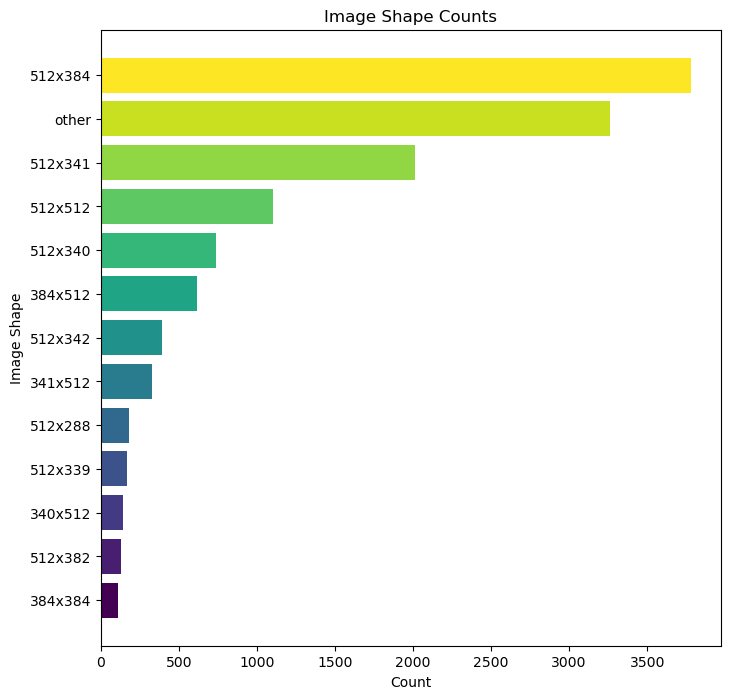

In [23]:
img_df.sort_values('img_count', inplace=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(img_df)))
plt.figure(figsize=(8, 8))
bars = plt.barh(img_df['img_shape'], img_df['img_count'], color=colors)
plt.title('Image Shape Counts')
plt.xlabel('Count')
plt.ylabel('Image Shape')
plt.show()


In [24]:
# convert to megabytes
img_size = img_size / 1000

The image size distribution is very obviously skewed. The data requires preprocessing.

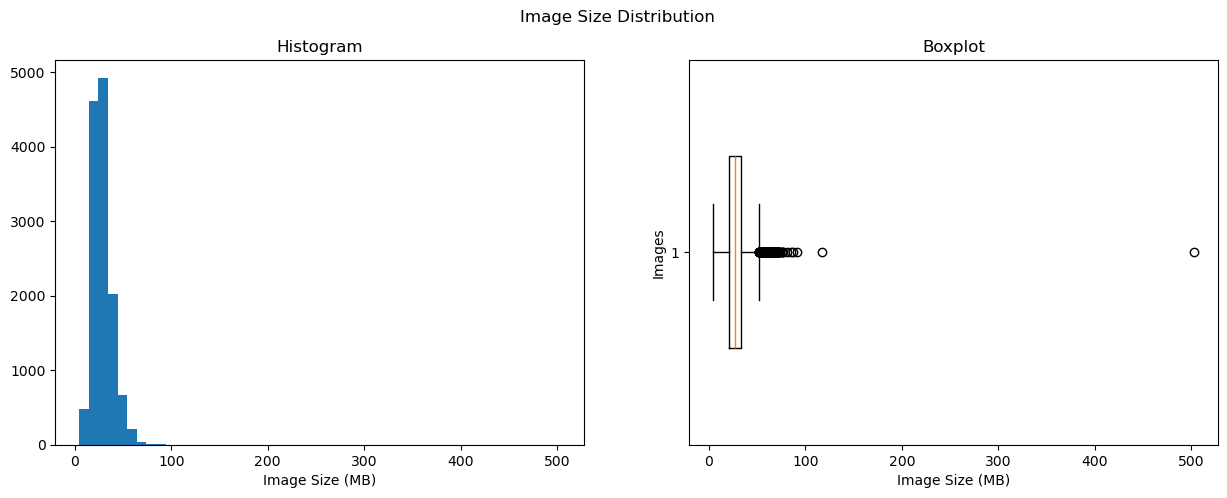

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Image Size Distribution')
ax[0].hist(img_size, bins=50)
ax[0].set_title('Histogram')
ax[0].set_xlabel('Image Size (MB)')
ax[1].boxplot(img_size, vert=False, widths=0.5)
ax[1].set_title('Boxplot')
ax[1].set_xlabel('Image Size (MB)')
ax[1].set_ylabel('Images')
plt.show()

# Preprocess

## Rescale the images

In [26]:
!mkdir ../images/resized

The syntax of the command is incorrect.


In [27]:
%%time
# resize image and save, convert to numpy

img_arr = np.zeros((df.shape[0],128*128*3)) # initialize np.array

for i, f in enumerate(tqdm(df.ImageID)):
    img = Image.open(path + '/' + f + '.jpg')
    img_resized = img.resize((128,128))
    img_resized.save("../images/resized/"+f+'.jpg', "JPEG", optimize=True)
    img_arr[i] = np.asarray(img_resized, dtype=np.uint8).flatten()

  0%|          | 0/12966 [00:00<?, ?it/s]

CPU times: total: 4.36 s
Wall time: 44.8 s


Plot the resized and filtered images

C:\Users\postw\AppData\Local\Temp\ipykernel_23516\245110220.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[i].add_patch(plt.Rectangle((coords[0]*w, coords[2]*h),
C:\Users\postw\AppData\Local\Temp\ipykernel_23516\245110220.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coords[1]*w-coords[0]*w, coords[3]*h-coords[2]*h,


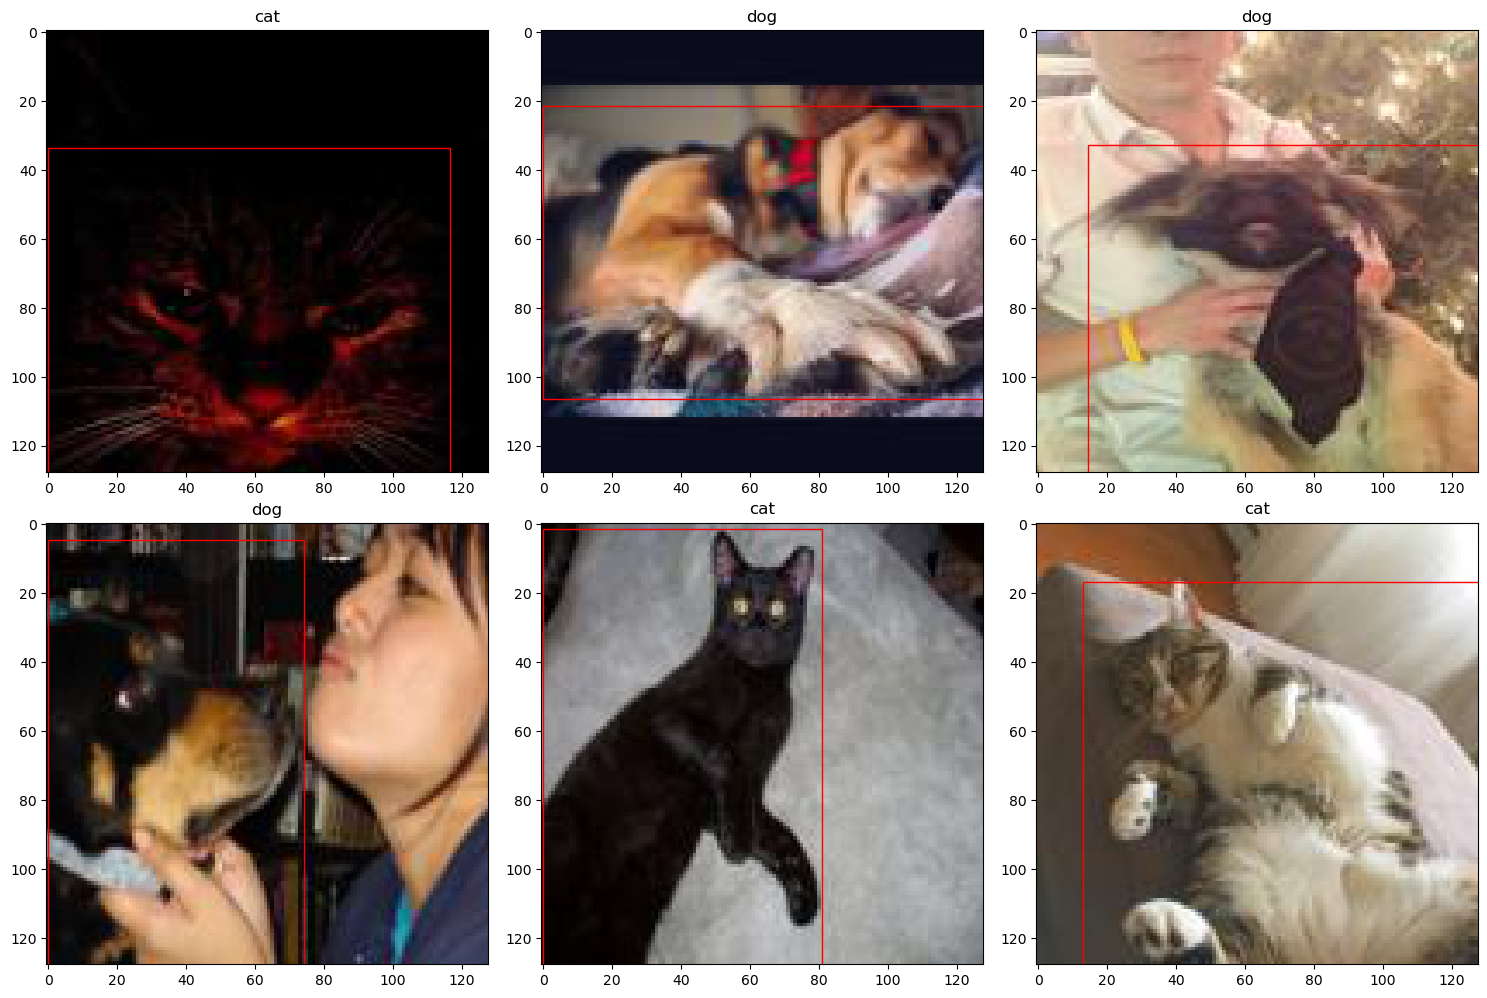

In [28]:
# plot random 6 images
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(np.random.choice(df.shape[0], size=6, replace=False)):
    img = mpimg.imread(path+'/resized/'+df.ImageID.values[j]+'.jpg')
    h, w = img.shape[:2]
    coords = df.iloc[j,4:8]
    ax[i].imshow(img)
    ax[i].set_title(df.iloc[j,2])
    ax[i].add_patch(plt.Rectangle((coords[0]*w, coords[2]*h), 
                                  coords[1]*w-coords[0]*w, coords[3]*h-coords[2]*h, 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

In [29]:
# encode labels
df['Label'] = (df.LabelName == 'dog').astype(np.uint8)

Plot data to show how resizing normalizes the distribution

  0%|          | 0/12966 [00:00<?, ?it/s]

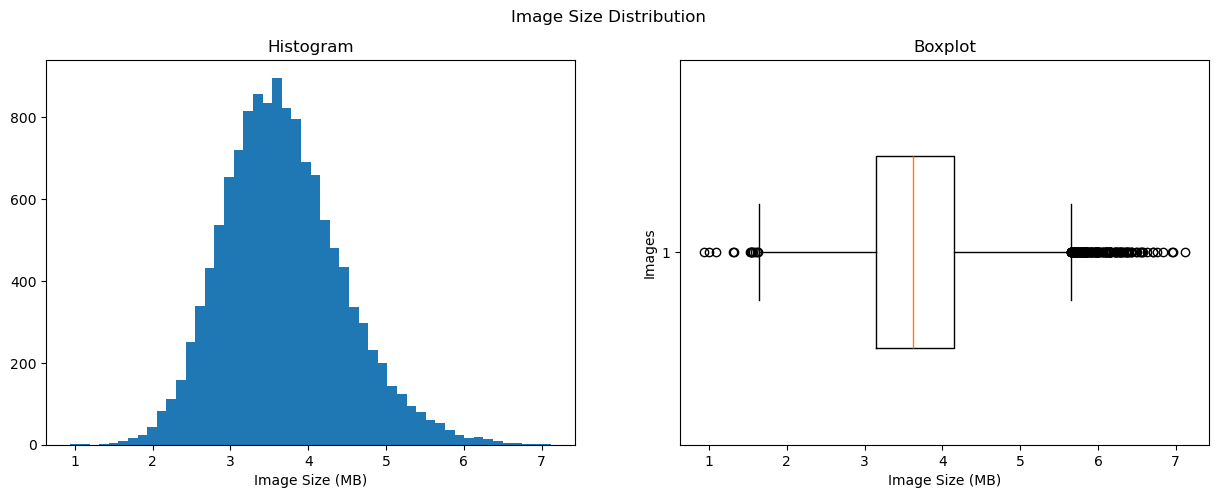

In [30]:
path1 = '../images/resized'
img_shape1 = []
img_size1 = np.zeros((df.shape[0], 1))

for i,f in enumerate(tqdm(glob.glob1(path1, '*.jpg'))):
    file = path1+'/'+f
    img = Image.open(file)
    img_shape1.append(f"{img.size[0]}x{img.size[1]}")
    img_size1[i] += os.path.getsize(file)


img_shape1_count = Counter(img_shape1)
# create a dataframe for image shapes
img_df1 = pd.DataFrame(set(img_shape1_count.items()), columns=['img_shape','img_count'])
img_size1 = img_size1 / 1000

fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Image Size Distribution')
ax[0].hist(img_size1, bins=50)
ax[0].set_title('Histogram')
ax[0].set_xlabel('Image Size (MB)')
ax[1].boxplot(img_size1, vert=False, widths=0.5)
ax[1].set_title('Boxplot')
ax[1].set_xlabel('Image Size (MB)')
ax[1].set_ylabel('Images')
plt.show()

## Checkpoint and Save data

In [31]:
mkdir -p data

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file data already exists.
Error occurred while processing: data.


In [32]:
np.save('data/img.npy', img_arr.astype(np.uint8))
np.save('data/y_label.npy', df.Label.values)
np.save('data/y_bbox.npy', df[['XMin', 'YMin', 'XMax', 'YMax']].values.astype(np.float32))

# Baseline Models

## Load data

In [33]:
X = np.load('data/img.npy', allow_pickle=True)
y_label = np.load('data/y_label.npy', allow_pickle=True)
y_bbox = np.load('data/y_bbox.npy', allow_pickle=True)

In [34]:
idx_to_label = {1:'dog', 0:'cat'} # encoder

Double check that it loaded correctly

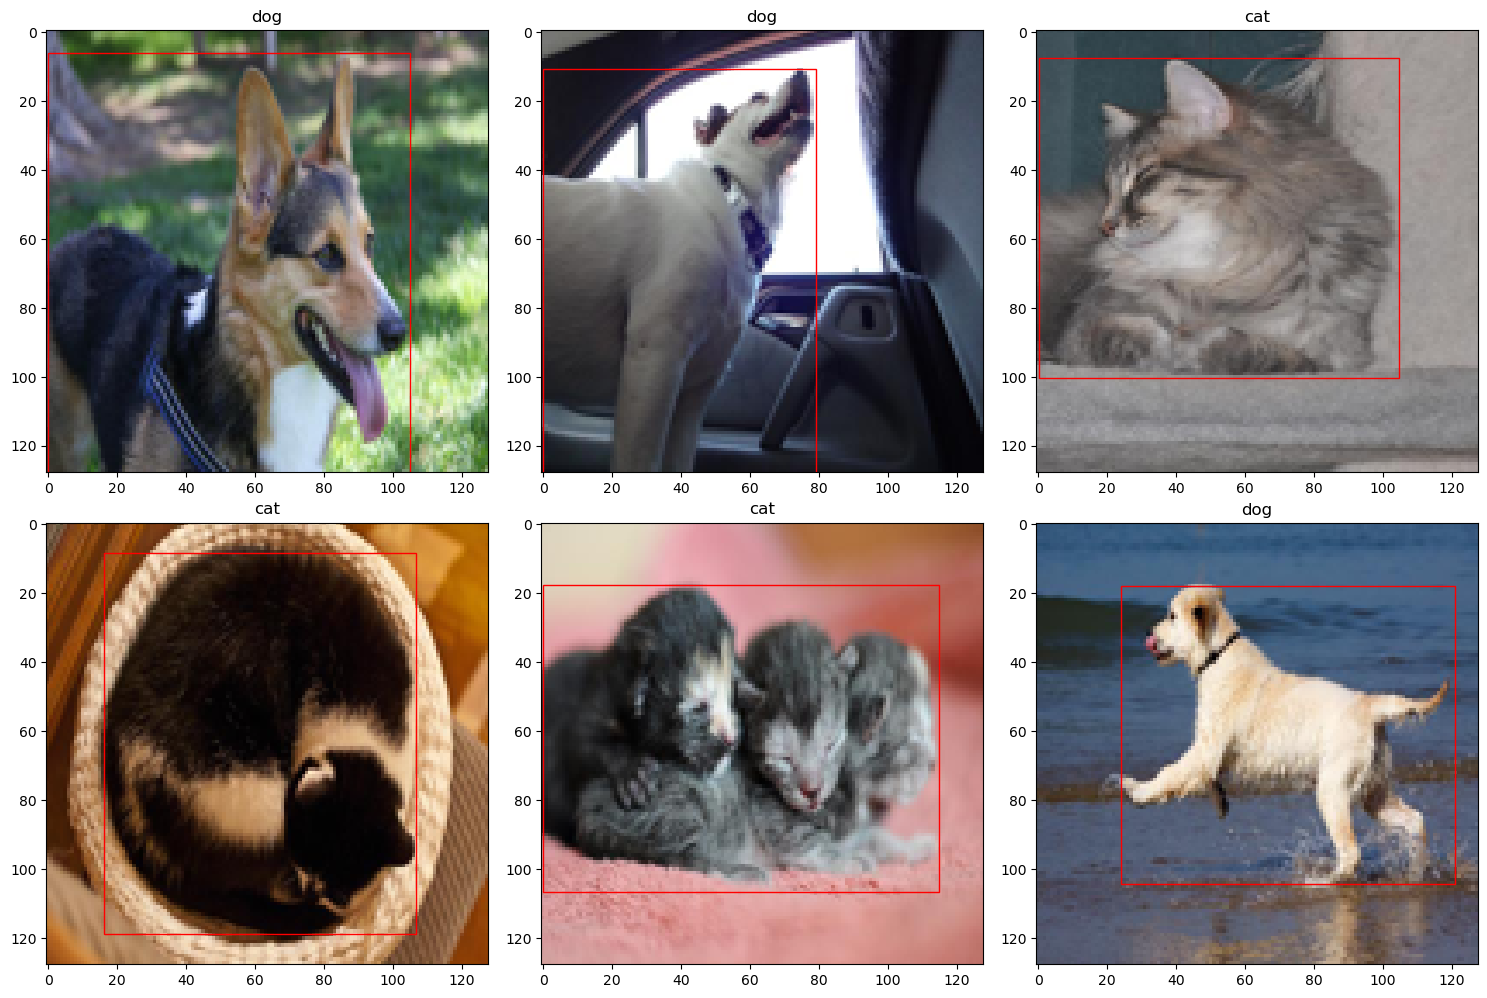

In [35]:
# plot random 6 images
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(np.random.choice(X.shape[0], size=6, replace=False)):
    coords = y_bbox[j] * 128
    ax[i].imshow(X[j].reshape(128,128,3))
    ax[i].set_title(idx_to_label[y_label[j]])
    ax[i].add_patch(plt.Rectangle((coords[0], coords[1]), 
                                  coords[2]-coords[0], coords[3]-coords[1], 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

## Classification

### Split data

Create training and testing sets to avoid data leakage

In [36]:
X_train, X_test, y_train, y_test_label = train_test_split(X, y_label, test_size=0.01, random_state=27)

### Train

I'm choosing `SGDClassifier` because the data is large and I want to be able to perform stochastic gradient descent and also its ability to early stop. With this many parameters, a model can easily overfit so it's important to try and find the point of where it begins to overfit and stop for optimal results.

In [37]:
%%time
model1 = SGDClassifier(loss='log', n_jobs=-1, random_state=27, learning_rate='adaptive', eta0=1e-10, 
                      early_stopping=True, validation_fraction=0.2, n_iter_no_change=3)
# 0.2 validation TODO
model1.fit(X_train, y_train)

C:\Users\postw\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


CPU times: total: 2.59 s
Wall time: 15.4 s


SGDClassifier(early_stopping=True, eta0=1e-10, learning_rate='adaptive',
              loss='log', n_iter_no_change=3, n_jobs=-1, random_state=27,
              validation_fraction=0.2)

In [38]:
model1.n_iter_

9

Did it stop too early? Let's retrain with a few more iterations to see. Note that `SGDClassifier` has a parameter called `validation_fraction` which splits a validation set from the training data to determine when it stops.

In [39]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=27)

In [40]:
model2 = SGDClassifier(loss='log', n_jobs=-1, random_state=27, learning_rate='adaptive', eta0=1e-10)

epochs = 30

train_acc = np.zeros(epochs)
valid_acc = np.zeros(epochs)
for i in tqdm(range(epochs)):
    model2.partial_fit(X_train, y_train, np.unique(y_train))
    
    #log
    train_acc[i] += np.round(accuracy_score(y_train, model2.predict(X_train)),3)
    valid_acc[i] += np.round(accuracy_score(y_valid, model2.predict(X_valid)),3)

  0%|          | 0/30 [00:00<?, ?it/s]

C:\Users\postw\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


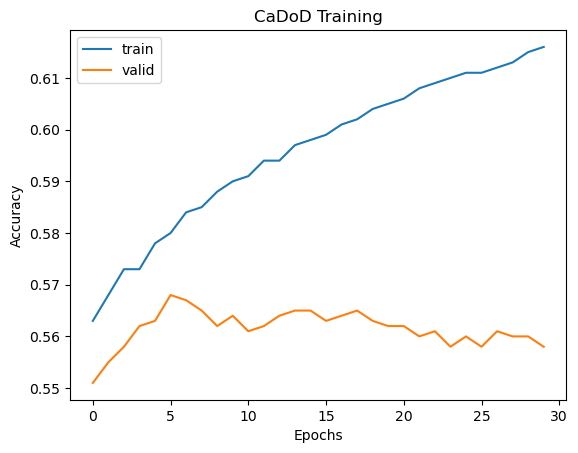

In [41]:
plt.plot(train_acc, label='train')
plt.plot(valid_acc, label='valid')
plt.title('CaDoD Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
del model2

### Evaluation

In [43]:
expLog = pd.DataFrame(columns=["exp_name", 
                               "Train Acc", 
                               "Valid Acc",
                               "Test  Acc",
                               "Train MSE", 
                               "Valid MSE",
                               "Test  MSE",
                              ])

In [44]:
exp_name = "Baseline: Linear Model (SGD Log Loss)"
accuracy_scores = [
    np.round(accuracy_score(y_train, model1.predict(X_train)), 3),
    np.round(accuracy_score(y_valid, model1.predict(X_valid)), 3),
    np.round(accuracy_score(y_test_label, model1.predict(X_test)), 3)
]
log_entry = [exp_name] + accuracy_scores + ['']

# Ensure 'expLogClass' DataFrame exists and has the correct structure
column_names = ['Experiment Name', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy', 'Description']
if 'expLogClass' not in locals():
    expLogClass = pd.DataFrame(columns=column_names)
else:
    # If 'expLogClass' exists but has a different structure, adjust it accordingly
    expLogClass = expLogClass.reindex(columns=column_names, fill_value=np.nan)
new_index = len(expLogClass)
expLogClass.loc[new_index] = log_entry  # Use .loc[new_index] to avoid the mismatch error


In [45]:
expLogClass

Experiment Name  Train Accuracy  Validation Accuracy  \
0  Baseline: Linear Model (SGD Log Loss)           0.585                0.587   

   Test Accuracy Description  
0          0.577

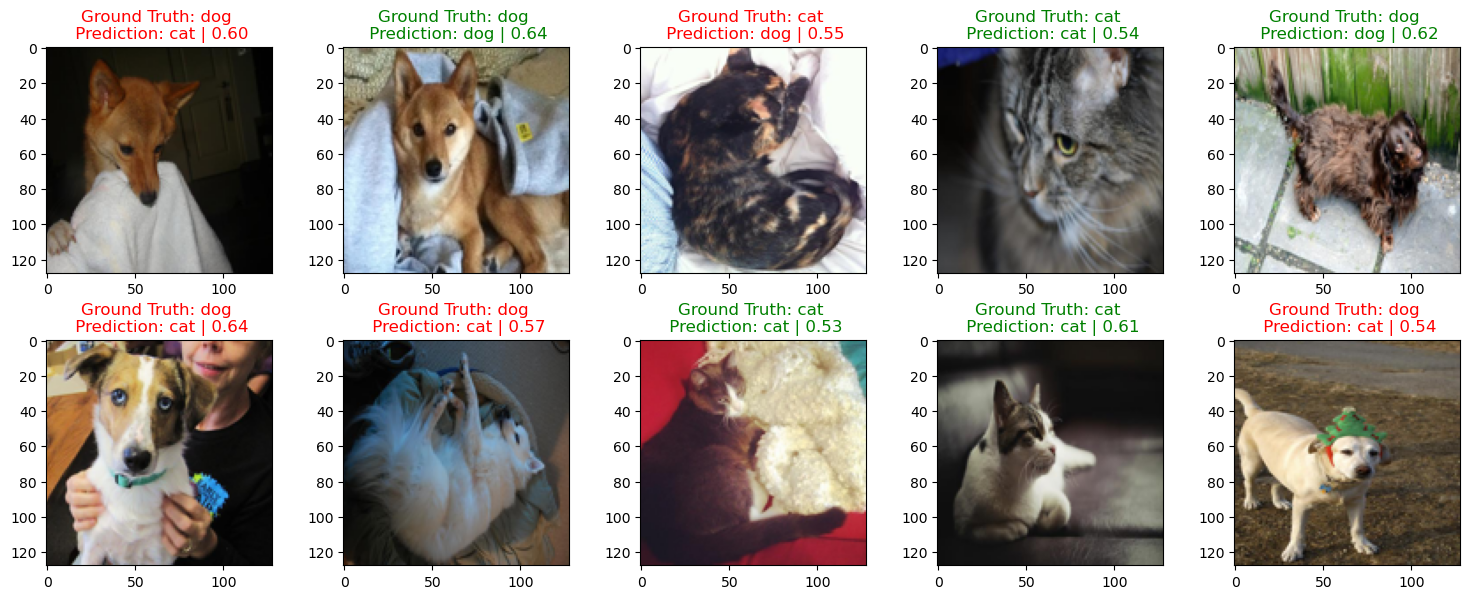

In [46]:
y_pred_label = model1.predict(X_test)
y_pred_label_proba = model1.predict_proba(X_test)

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=False, sharey=False,figsize=(15,6))
ax = ax.flatten()

for i in range(10):
    img = X_test[i].reshape(128,128,3)
    ax[i].imshow(img)
    ax[i].set_title("Ground Truth: {0} \n Prediction: {1} | {2:.2f}".format(idx_to_label[y_test_label[i]],
                                                                   idx_to_label[y_pred_label[i]],
                                                                   y_pred_label_proba[i][y_pred_label[i]]),
                   color=("green" if y_pred_label[i]==y_test_label[i] else "red"))

plt.tight_layout()
plt.show()

## Regression with multiple targets $[y_1, y_2, y_3, y_4]$

Train a linear regression model on multiple target values $[y_1, y_2, y_3, y_4]$ corresponding to [x, y, w, h] of the bounding box containing the object of interest. For more details see [SKLearn's manpage on LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

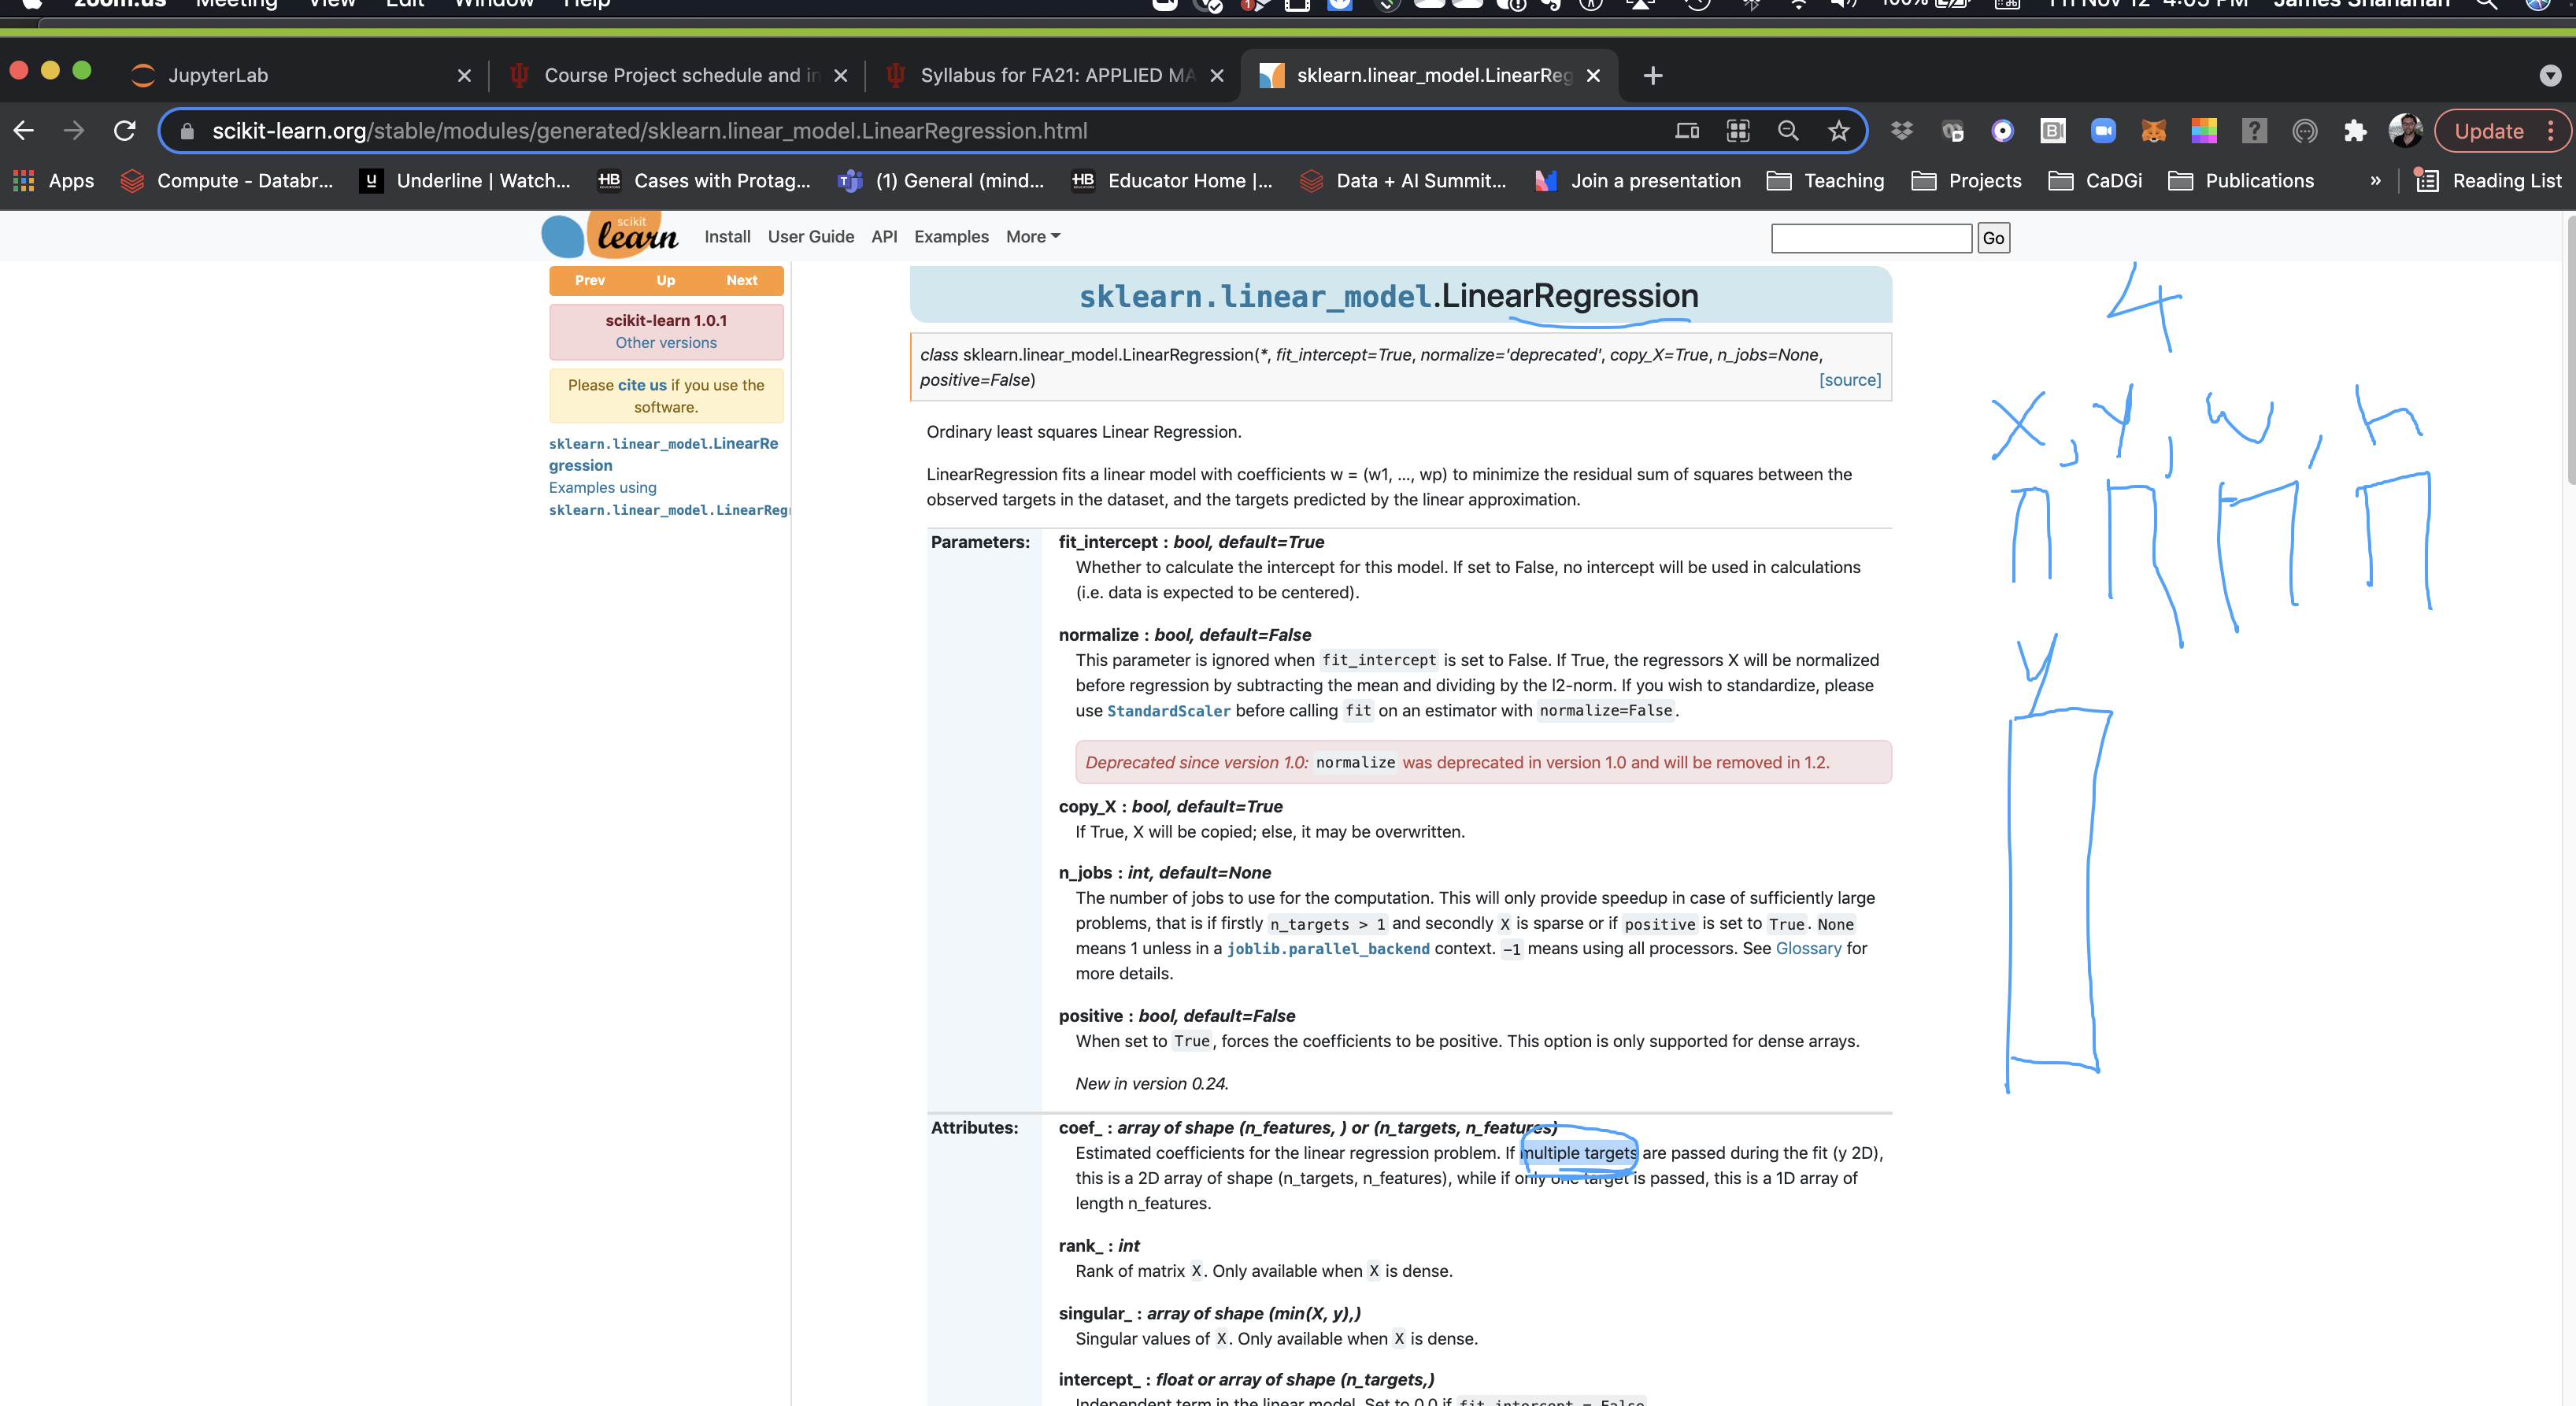### Split data

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bbox, test_size=0.01, random_state=27)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=27)

### Train

In [48]:
%%time

from sklearn.linear_model import LinearRegression, Lasso, Ridge
# TODO closed loop solution, could use Lasso Ridge
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

# might take a few minutes to train
#CPU times: user 1h 26min 40s, sys: 5min 53s, total: 1h 32min 34s
#Wall time: 17min 24s

CPU times: total: 20min 48s
Wall time: 5min 7s


LinearRegression(n_jobs=-1)

### Evaluation

In [49]:
exp_name_mse = "Baseline: Linear Regression Model"
mse_scores = [
    np.round(mean_squared_error(y_train, model.predict(X_train)), 3),
    np.round(mean_squared_error(y_valid, model.predict(X_valid)), 3),
    np.round(mean_squared_error(y_test, model.predict(X_test)), 3)
]
log_entry = [exp_name_mse] + mse_scores + ['']

# Ensure 'expLogReg' DataFrame exists and has the correct structure
column_names = ['Experiment Name', 'Train Metric', 'Validation Metric', 'Test Metric', 'Description']

# We initialize the expLogReg dataframe here
expLogReg = pd.DataFrame(columns=column_names)
# If 'expLogReg' exists but has a different structure, adjust it accordingly
expLogReg = expLogReg.reindex(columns=column_names, fill_value=np.nan)
new_index = len(expLogReg)
expLogReg.loc[new_index] = log_entry 
expLogReg

Experiment Name  Train Metric  Validation Metric  \
0  Baseline: Linear Regression Model           0.0              0.036   

   Test Metric Description  
0        0.035

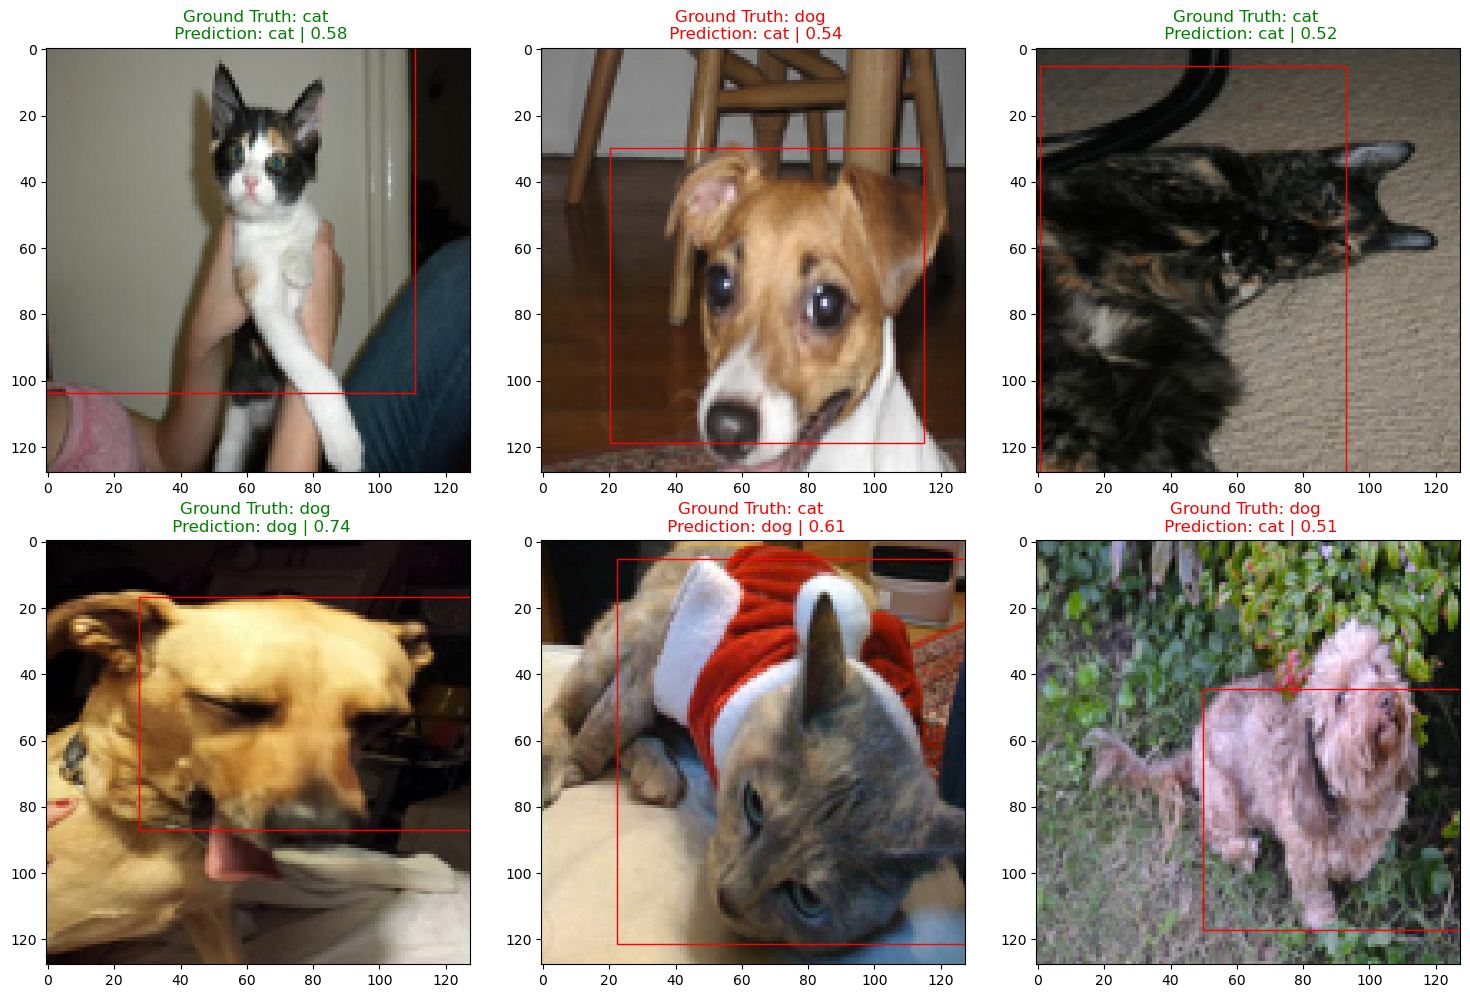

In [50]:
y_pred_bbox = model.predict(X_test)

fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(np.random.choice(X_test.shape[0], size=6, replace=False)):
    img = X_test[j].reshape(128,128,3)
    coords = y_pred_bbox[j] * 128
    ax[i].imshow(img)
    ax[i].set_title("Ground Truth: {0} \n Prediction: {1} | {2:.2f}".format(idx_to_label[y_test_label[j]],
                                                                   idx_to_label[y_pred_label[j]],
                                                                   y_pred_label_proba[j][y_pred_label[j]]),
                   color=("green" if y_pred_label[j]==y_test_label[j] else "red"))
    ax[i].add_patch(plt.Rectangle((coords[0], coords[1]), 
                                  coords[2]-coords[0], coords[3]-coords[1], 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

# MLP Models

We will be building MLP models to perform image classification and regression using PyTorch and Torchvision.

We will then be comparing the MLP models with the baseline SGDClassifier and Linear Regression models created in the previous phase.

We import Pytorch and torchvision to build the models, and some sklearn classes to perform normalization.

In [66]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import Dataset, DataLoader, TensorDataset

from sklearn.preprocessing import StandardScaler

## Normalization
We first perform z-score normlization by subtracting each image by the train and test dataset mean and dividing by the standard deviation of the corresponding dataset. Z-score normalization is used to standardize the pixel values so that they have a mean of 0 and a standard deviation of 1.

In [67]:
# Flatten the images to compute mean and std
X_flattened = X.reshape(-1, X.shape[-1])

# Compute mean and std before normalization
mean_before = np.mean(X_flattened)
std_before = np.std(X_flattened)

print(f"Mean before normalization: {mean_before}")
print(f"Standard deviation before normalization: {std_before}")

Mean before normalization: 108.47303526171915
Standard deviation before normalization: 70.35824559103014


In [68]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the entire dataset
X_scaled = scaler.fit_transform(X_flattened).reshape(X.shape)

# Flatten the scaled images to compute mean and std
X_scaled_flattened = X_scaled.reshape(-1, X_scaled.shape[-1])

# Compute mean and std after normalization
mean_after = np.mean(X_scaled_flattened)
std_after = np.std(X_scaled_flattened)

print(f"\nMean after normalization: {mean_after}")
print(f"Standard deviation after normalization: {std_after}")


Mean after normalization: 6.074002824579145e-17
Standard deviation after normalization: 0.9999999999999969


## Data Splitting and Data Loading
We split the data into 1% testing data and 99% training data. We then use 10% of the training data as the validation set.

In [69]:
# 20% train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_label, test_size=0.01, random_state=27)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [70]:
print(f'Number of training samples: {len(X_train)}')
print(f'Number of validation samples: {len(X_val)}')
print(f'Number of testing samples: {len(X_test)}')

print(X_train[0])

Number of training samples: 11552
Number of validation samples: 1284
Number of testing samples: 130
[1.54278891 1.80062138 1.99893775 ... 0.57402656 0.74169861 0.79023272]


In [71]:
# Convert NumPy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

print(X_train[0])

tensor([1.5428, 1.8006, 1.9989,  ..., 0.5740, 0.7417, 0.7902])


We set a random seed for Numpy, Python and Pytorch to reproduce results.

In [72]:
set_seed = 1234

np.random.seed(set_seed)
torch.cuda.manual_seed(set_seed)
torch.manual_seed(set_seed)
torch.backends.cudnn.deterministic = True

Load data in Pytorch by creating a custom dataset and using Pytorch Dataloader class.

In [73]:
# Create custom datasets
class CustomDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        return self.images[index], self.labels[index]

# Create datasets
train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)
test_dataset = CustomDataset(X_test, y_test)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## MLP Model for Image Classification

In [74]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 100)
        self.fc3 = nn.Linear(100, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [75]:
# Define the dimensions
input_dim = X_train.shape[1]
hidden_dim = 250 
output_dim = 2

To train the model, we use the Adam optimization algorithm as it uses both momentum and scaling to have the benefits of SGD and RMSProp. We also use CrossEntropyLoss, which is a good loss function for classification tasks. We try out different number of hidden layer dimensions and learning rates to see which gives the best performance. All MLP models have 2 hidden layers and ReLU is applied after each linear transformation.

In [76]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define different hyperparameters
hyperparams_list = [
    {'hidden_dim': 64, 'lr': 0.001},
    {'hidden_dim': 128, 'lr': 0.001},
    {'hidden_dim': 128, 'lr': 0.0001},
    {'hidden_dim': 256, 'lr': 0.001},
    {'hidden_dim': 256, 'lr': 0.0001}
]

# Set number of epochs
epochs = 10

# Store the cross-validation accuracy for each case
cv_accs = []
train_accs = []
test_accs = []

for i, hyperparams in enumerate(hyperparams_list):
    print(f"Running case {i+1}: {hyperparams}")
    
    # Initialize the model
    model = MLP(input_dim, hyperparams['hidden_dim'], output_dim)
    
    # Define the optimizer with the specified learning rate and loss function
    optimizer = optim.Adam(model.parameters(), lr=hyperparams['lr'])
    criterion = nn.CrossEntropyLoss()
    
    # Define lists to store train and validation accuracies for plotting
    train_acc_list = []
    val_acc_list = []

    # Training loop
    for epoch in range(epochs):
        # Training
        model.train()
        train_acc = 0.0
        train_loss = 0.0  # Initialize training loss
        
        for images, labels in train_loader:
            images = images.view(images.size(0), -1)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()  # Accumulate training loss
            _, predicted = torch.max(outputs, 1)
            train_acc += (predicted == labels).sum().item() / labels.size(0)
        
        train_loss /= len(train_loader)  # Calculate average training loss
        train_acc /= len(train_loader)
        train_acc_list.append(train_acc)

        # Validation
        model.eval()
        val_acc = 0.0
        val_loss = 0.0  # Initialize validation loss
        
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.view(images.size(0), -1)
                outputs = model(images)
                loss = criterion(outputs, labels.long())
                val_loss += loss.item()  # Accumulate validation loss
                _, predicted = torch.max(outputs, 1)
                val_acc += (predicted == labels).sum().item() / labels.size(0)
        
        val_loss /= len(val_loader)  # Calculate average validation loss
        val_acc /= len(val_loader)
        val_acc_list.append(val_acc)
        
        print(f"Epoch {epoch+1}/{epochs}:")
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    
    # Store the validation accuracies for plotting
    cv_accs.append(val_acc_list) 
    train_accs.append(train_acc_list)

    # Compute test accuracy on X_test
    test_acc_test = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(images.size(0), -1)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            test_acc_test += (predicted == labels).sum().item() / labels.size(0)
    
    test_acc_test /= len(test_loader)
    print(f"Test Accuracy on X_test: {test_acc_test:.4f}")
    test_accs.append(test_acc_test)

Running case 1: {'hidden_dim': 64, 'lr': 0.001}
Epoch 1/10:
Train Loss: 1.1575, Train Acc: 0.5340
Val Loss: 0.9140, Val Acc: 0.5694
Epoch 2/10:
Train Loss: 0.7477, Train Acc: 0.5810
Val Loss: 0.7194, Val Acc: 0.5556
Epoch 3/10:
Train Loss: 0.6670, Train Acc: 0.6165
Val Loss: 0.7352, Val Acc: 0.5381
Epoch 4/10:
Train Loss: 0.6415, Train Acc: 0.6436
Val Loss: 0.7413, Val Acc: 0.5518
Epoch 5/10:
Train Loss: 0.6123, Train Acc: 0.6714
Val Loss: 0.7407, Val Acc: 0.5655
Epoch 6/10:
Train Loss: 0.5956, Train Acc: 0.6827
Val Loss: 0.7734, Val Acc: 0.5267
Epoch 7/10:
Train Loss: 0.5821, Train Acc: 0.7014
Val Loss: 0.7642, Val Acc: 0.5884
Epoch 8/10:
Train Loss: 0.5608, Train Acc: 0.7170
Val Loss: 0.8131, Val Acc: 0.5495
Epoch 9/10:
Train Loss: 0.5294, Train Acc: 0.7375
Val Loss: 0.8155, Val Acc: 0.5724
Epoch 10/10:
Train Loss: 0.4999, Train Acc: 0.7587
Val Loss: 0.8939, Val Acc: 0.5747
Test Accuracy on X_test: 0.5062
Running case 2: {'hidden_dim': 128, 'lr': 0.001}
Epoch 1/10:
Train Loss: 1.0423

It seems the MLP model doesn't do well to learn the necessary features to classify images, as the training accuracy seems to increase but the validation accuracy doesn't seem to increase with it. It seems MLP is very prone to overfitting.

In [62]:
# Initialize DataFrame if not exists
column_names = ['Experiment Name', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy', 'Description']
if 'expLogClass' not in locals():
    expLogClass = pd.DataFrame(columns=column_names)
else:
    expLogClass = expLogClass.reindex(columns=column_names, fill_value=np.nan)

descriptions = []

# Log results for each MLP model
for i, hyperparams in enumerate(hyperparams_list):
    val_acc = cv_accs[i][-1]
    train_acc = train_accs[i][-1]
    
    # Define model name and descriptions
    model_name = f"MLP Model {i+1}"
    description = f"hidden_dim: {hyperparams['hidden_dim']}, lr: {hyperparams['lr']}"
    descriptions.append(description)
    
    test_acc = np.round(test_accs[i], 3)  # Get test accuracy from test_accs list
    
    # Create log entry
    log_entry = [model_name, train_acc, val_acc, test_acc, description]
    
    # Add log entry to DataFrame
    new_index = len(expLogClass)
    expLogClass.loc[new_index] = log_entry

# Display the updated expLogClass
expLogClass

Experiment Name  Train Accuracy  Validation Accuracy  \
0  Baseline: Linear Model (SGD Log Loss)        0.585000             0.587000   
1                            MLP Model 1        0.758657             0.574695   
2                            MLP Model 2        0.736323             0.562500   
3                            MLP Model 3        0.911530             0.557927   
4                            MLP Model 4        0.650364             0.571646   
5                            MLP Model 5        0.931440             0.567073   

   Test Accuracy                  Description  
0          0.577                               
1          0.506    hidden_dim: 64, lr: 0.001  
2          0.488   hidden_dim: 128, lr: 0.001  
3          0.462  hidden_dim: 128, lr: 0.0001  
4          0.538   hidden_dim: 256, lr: 0.001  
5          0.531  hidden_dim: 256, lr: 0.0001

The best performing MLP model has 256 hidden dimensions and a learning rate of 0.001 (with 2 hidden layers and ReLU activation function after each linear transformation in hidden layers), and it got a test accuracy of 53.8%, which is worse than our baseline Linear Model.

It seems as we increase the hidden layer dimensions, the test accuracy increases. Let's test out some more models with higher hidden layer dimensions.

In [77]:
# Define different hyperparameters
hyperparams_list = [
    {'hidden_dim': 512, 'lr': 0.001},
    {'hidden_dim': 1024, 'lr': 0.001},
    {'hidden_dim': 2042, 'lr': 0.001},
]

# Set number of epochs
epochs = 10

# Store the cross-validation accuracy for each case
cv_accs = []
train_accs = []
test_accs = []

for i, hyperparams in enumerate(hyperparams_list):
    print(f"Running case {i+1}: {hyperparams}")
    
    # Initialize the model
    model = MLP(input_dim, hyperparams['hidden_dim'], output_dim)
    
    # Define the optimizer with the specified learning rate and loss function
    optimizer = optim.Adam(model.parameters(), lr=hyperparams['lr'])
    criterion = nn.CrossEntropyLoss()
    
    # Define lists to store train and validation accuracies for plotting
    train_acc_list = []
    val_acc_list = []

    # Training loop
    for epoch in range(epochs):
        # Training
        model.train()
        train_acc = 0.0
        train_loss = 0.0  # Initialize training loss
        
        for images, labels in train_loader:
            images = images.view(images.size(0), -1)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()  # Accumulate training loss
            _, predicted = torch.max(outputs, 1)
            train_acc += (predicted == labels).sum().item() / labels.size(0)
        
        train_loss /= len(train_loader)  # Calculate average training loss
        train_acc /= len(train_loader)
        train_acc_list.append(train_acc)

        # Validation
        model.eval()
        val_acc = 0.0
        val_loss = 0.0  # Initialize validation loss
        
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.view(images.size(0), -1)
                outputs = model(images)
                loss = criterion(outputs, labels.long())
                val_loss += loss.item()  # Accumulate validation loss
                _, predicted = torch.max(outputs, 1)
                val_acc += (predicted == labels).sum().item() / labels.size(0)
        
        val_loss /= len(val_loader)  # Calculate average validation loss
        val_acc /= len(val_loader)
        val_acc_list.append(val_acc)
        
        print(f"Epoch {epoch+1}/{epochs}:")
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    
    # Store the validation accuracies for plotting
    cv_accs.append(val_acc_list) 
    train_accs.append(train_acc_list)

    # Compute test accuracy on X_test
    test_acc_test = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(images.size(0), -1)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            test_acc_test += (predicted == labels).sum().item() / labels.size(0)
    
    test_acc_test /= len(test_loader)
    print(f"Test Accuracy on X_test: {test_acc_test:.4f}")
    test_accs.append(test_acc_test)

Running case 1: {'hidden_dim': 512, 'lr': 0.001}
Epoch 1/10:
Train Loss: 0.8991, Train Acc: 0.5160
Val Loss: 0.6994, Val Acc: 0.5236
Epoch 2/10:
Train Loss: 0.6923, Train Acc: 0.5435
Val Loss: 0.7077, Val Acc: 0.5381
Epoch 3/10:
Train Loss: 0.6849, Train Acc: 0.5594
Val Loss: 0.6926, Val Acc: 0.5595
Epoch 4/10:
Train Loss: 0.6786, Train Acc: 0.5708
Val Loss: 0.6829, Val Acc: 0.5678
Epoch 5/10:
Train Loss: 0.6753, Train Acc: 0.5843
Val Loss: 0.6931, Val Acc: 0.5701
Epoch 6/10:
Train Loss: 0.6765, Train Acc: 0.5798
Val Loss: 0.6890, Val Acc: 0.5602
Epoch 7/10:
Train Loss: 0.6700, Train Acc: 0.5864
Val Loss: 0.7014, Val Acc: 0.5160
Epoch 8/10:
Train Loss: 0.6684, Train Acc: 0.5893
Val Loss: 0.7018, Val Acc: 0.5412
Epoch 9/10:
Train Loss: 0.6587, Train Acc: 0.6067
Val Loss: 0.6907, Val Acc: 0.5755
Epoch 10/10:
Train Loss: 0.6553, Train Acc: 0.6130
Val Loss: 0.7251, Val Acc: 0.5694
Test Accuracy on X_test: 0.6500
Running case 2: {'hidden_dim': 1024, 'lr': 0.001}
Epoch 1/10:
Train Loss: 0.87

In [78]:
# Initialize DataFrame if not exists
column_names = ['Experiment Name', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy', 'Description']
if 'expLogClass' not in locals():
    expLogClass = pd.DataFrame(columns=column_names)
else:
    expLogClass = expLogClass.reindex(columns=column_names, fill_value=np.nan)

descriptions = []

# Log results for each MLP model
for i, hyperparams in enumerate(hyperparams_list):
    val_acc = cv_accs[i][-1]
    train_acc = train_accs[i][-1]
    
    # Define model name and descriptions
    model_name = f"MLP Model {i+6}"
    description = f"hidden_dim: {hyperparams['hidden_dim']}, lr: {hyperparams['lr']}"
    descriptions.append(description)
    
    test_acc = np.round(test_accs[i], 3)  # Get test accuracy from test_accs list
    
    # Create log entry
    log_entry = [model_name, train_acc, val_acc, test_acc, description]
    
    # Add log entry to DataFrame
    new_index = len(expLogClass)
    expLogClass.loc[new_index] = log_entry

# Display the updated expLogClass
expLogClass

Experiment Name  Train Accuracy  Validation Accuracy  \
0  Baseline: Linear Model (SGD Log Loss)        0.585000             0.587000   
1                            MLP Model 1        0.758657             0.574695   
2                            MLP Model 2        0.736323             0.562500   
3                            MLP Model 3        0.911530             0.557927   
4                            MLP Model 4        0.650364             0.571646   
5                            MLP Model 5        0.931440             0.567073   
6                            MLP Model 6        0.612967             0.569360   
7                            MLP Model 7        0.529259             0.519055   
8                            MLP Model 8        0.529259             0.519055   

   Test Accuracy                  Description  
0          0.577                               
1          0.506    hidden_dim: 64, lr: 0.001  
2          0.488   hidden_dim: 128, lr: 0.001  
3          0.462  hidden_dim: 128, lr: 0.0001  
4          0.538   hidden_dim: 256, lr: 0.001  
5          0.531  hidden_dim: 256, lr: 0.0001  
6          0.650   hidden_dim: 512, lr: 0.001  
7          0.600  hidden_dim: 1024, lr: 0.001  
8          0.600  hidden_dim: 2042, lr: 0.001

The best MLP classification model came out to be MLP Model 6, with hidden layer dimensions = 512 and a learning rate of 0.001.

## MLP Model for Regression

In [79]:
# Load data again
X = np.load('data/img.npy', allow_pickle=True)
y_label = np.load('data/y_label.npy', allow_pickle=True)
y_bbox = np.load('data/y_bbox.npy', allow_pickle=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_bbox, test_size=0.01, random_state=27)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=27)

We test different hidden layer dimension and learning rates for the MLP regression model as well, this time with number of epochs = 1500 and using MSE as the loss function along with Adam optimization.

In [80]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 100)
        self.fc3 = nn.Linear(100, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_valid_tensor = torch.tensor(X_valid, dtype=torch.float32)
y_valid_tensor = torch.tensor(y_valid, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Hyperparameters
hyperparams_list = [
    {'hidden_dim': 64, 'lr': 0.001},
    {'hidden_dim': 128, 'lr': 0.001},
    {'hidden_dim': 128, 'lr': 0.0001},
    {'hidden_dim': 256, 'lr': 0.001},
    {'hidden_dim': 256, 'lr': 0.0001}
]

results = []

for hyperparams in hyperparams_list:
    print("Training model: " + str(hyperparams))
    # Initialize the model
    input_dim = X_train.shape[1]
    hidden_dim = hyperparams['hidden_dim']
    output_dim = y_train.shape[1]
    model = MLP(input_dim, hidden_dim, output_dim)

    # Define loss and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=hyperparams['lr'])

    # Training loop
    num_epochs = 1500
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        if epoch == num_epochs - 1:  # Print the loss for the last epoch
            # Evaluation
            model.eval()
            with torch.no_grad():
                train_outputs = model(X_train_tensor)
                train_loss = criterion(train_outputs, y_train_tensor)
                
                valid_outputs = model(X_valid_tensor)
                valid_loss = criterion(valid_outputs, y_valid_tensor)

                test_outputs = model(X_test_tensor)
                test_loss = criterion(test_outputs, y_test_tensor)

            
            results.append({
                'hidden_dim': hidden_dim,
                'lr': hyperparams['lr'],
                'train_mse': train_loss.item(),
                'valid_mse': valid_loss.item(),
                'test_mse': test_loss.item()
            })

            print(f"Hidden Dim: {hidden_dim}, LR: {hyperparams['lr']}, Epoch: {epoch + 1}/{num_epochs}, Train MSE: {train_loss.item():.4f}, Valid MSE: {valid_loss.item():.4f}, Test MSE: {test_loss.item():.4f}")
        else:
            # Validation
            model.eval()
            with torch.no_grad():
                valid_outputs = model(X_valid_tensor)
                valid_loss = criterion(valid_outputs, y_valid_tensor)
        
            print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {loss.item():.4f}, Valid Loss: {valid_loss.item():.4f}")


# Print final results
for result in results:
    print(f"Hidden Dim: {result['hidden_dim']}, LR: {result['lr']}, Train MSE: {result['train_mse']:.4f}, Valid MSE: {result['valid_mse']:.4f}, Test MSE: {result['test_mse']:.4f}")

Training model: {'hidden_dim': 64, 'lr': 0.001}
Epoch [1/1500], Train Loss: 295.2756, Valid Loss: 1607779.5000
Epoch [2/1500], Train Loss: 1592255.8750, Valid Loss: 76618.4297
Epoch [3/1500], Train Loss: 75854.6719, Valid Loss: 152936.5156
Epoch [4/1500], Train Loss: 151591.5469, Valid Loss: 145260.0312
Epoch [5/1500], Train Loss: 143873.7500, Valid Loss: 118973.1562
Epoch [6/1500], Train Loss: 117788.2109, Valid Loss: 61485.9922
Epoch [7/1500], Train Loss: 60861.8711, Valid Loss: 11701.1074
Epoch [8/1500], Train Loss: 11576.1055, Valid Loss: 4336.7041
Epoch [9/1500], Train Loss: 4303.5317, Valid Loss: 38573.2461
Epoch [10/1500], Train Loss: 38226.7969, Valid Loss: 59933.5195
Epoch [11/1500], Train Loss: 59382.1602, Valid Loss: 41088.1367
Epoch [12/1500], Train Loss: 40727.5273, Valid Loss: 13539.1514
Epoch [13/1500], Train Loss: 13425.6787, Valid Loss: 1136.6268
Epoch [14/1500], Train Loss: 1122.7615, Valid Loss: 3069.7217
Epoch [15/1500], Train Loss: 3032.0249, Valid Loss: 5234.5967


In [81]:
# Initialize DataFrame if not exists
column_names = ['Experiment Name', 'Train Metric', 'Validation Metric', 'Test Metric', 'Description']
if 'expLogReg' not in locals():
    expLogReg = pd.DataFrame(columns=column_names)
else:
    expLogReg = expLogReg.reindex(columns=column_names, fill_value=np.nan)

descriptions = []

# Log results for each MLP model
for i, result in enumerate(results):
    train_mse = result['train_mse']
    valid_mse = result['valid_mse']
    test_mse = result['test_mse']
    
    # Define experiment name and descriptions
    exp_name_mse = f"MLP Regression Model {i+1} (mse)"
    description = f"hidden_dim: {result['hidden_dim']}, lr: {result['lr']}"
    descriptions.append(description)
    
    # Create log entry
    log_entry = [exp_name_mse, train_mse, valid_mse, test_mse, description]
    
    # Add log entry to DataFrame
    new_index = len(expLogReg)
    expLogReg.loc[new_index] = log_entry

# Display the updated expLogReg
expLogReg

Experiment Name  Train Metric  Validation Metric  \
0  Baseline: Linear Regression Model      0.000000           0.036000   
1             MLP Regression Model 0      0.196750           0.231603   
2             MLP Regression Model 1      0.223315           0.266740   
3             MLP Regression Model 2      0.370914           0.494337   
4             MLP Regression Model 3      0.281504           0.336132   
5             MLP Regression Model 4      0.458599           0.568745   

   Test Metric                  Description  
0     0.035000                               
1     0.199059    hidden_dim: 64, lr: 0.001  
2     0.252930   hidden_dim: 128, lr: 0.001  
3     0.535217  hidden_dim: 128, lr: 0.0001  
4     0.335829   hidden_dim: 256, lr: 0.001  
5     0.541633  hidden_dim: 256, lr: 0.0001

In [83]:
# Update column names to include metric name
expLogReg.columns = ['Experiment Name', 'Train MSE', 'Validation MSE', 'Test MSE', 'Description']

# Display the updated expLogReg
expLogReg

Experiment Name  Train MSE  Validation MSE  Test MSE  \
0  Baseline: Linear Regression Model   0.000000        0.036000  0.035000   
1             MLP Regression Model 0   0.196750        0.231603  0.199059   
2             MLP Regression Model 1   0.223315        0.266740  0.252930   
3             MLP Regression Model 2   0.370914        0.494337  0.535217   
4             MLP Regression Model 3   0.281504        0.336132  0.335829   
5             MLP Regression Model 4   0.458599        0.568745  0.541633   

                   Description  
0                               
1    hidden_dim: 64, lr: 0.001  
2   hidden_dim: 128, lr: 0.001  
3  hidden_dim: 128, lr: 0.0001  
4   hidden_dim: 256, lr: 0.001  
5  hidden_dim: 256, lr: 0.0001

As we can see from the results above, the lowest test MSE is obtained from the MLP regression model with hidden layer dimensions = 64 and learning rate of 0.001. Intrestingly, the Test MSE increased as the hidden layer dimensions increased.

### Multi-headed cat/dog detector using with multi-task loss function
Using CNN as base and CXE + MSE with OOP API in Pytorch

In [5]:
!pip install torchvision

   ---------------------------------------- 1.2/1.2 MB 12.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Set up pytorch dataset

In [24]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

class CatDogDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.annotations = pd.read_csv(csv_file, usecols=['ImageID', 'LabelName', 'XMin', 'XMax', 'YMin', 'YMax'])

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_name = self.annotations.iloc[idx]['ImageID'] + '.jpg'
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert('RGB')

        label = 0 if 'cat' in self.annotations.iloc[idx]['LabelName'].lower() else 1

        x_min = self.annotations.iloc[idx]['XMin'] * 224
        y_min = self.annotations.iloc[idx]['YMin'] * 224
        x_max = self.annotations.iloc[idx]['XMax'] * 224
        y_max = self.annotations.iloc[idx]['YMax'] * 224
        bbox = torch.tensor([x_min, y_min, x_max, y_max], dtype=torch.float32)

        if self.transform:
            image = self.transform(image)

        return {'image': image, 'label': label, 'bbox': bbox}

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to uniform size
    transforms.ToTensor()
])

# Instantiate the dataset
dataset = CatDogDataset(
    csv_file=r'C:\Users\genev\OneDrive - Indiana University\Classes\P556\cadod.csv',
    img_dir=r'C:\Users\genev\OneDrive - Indiana University\Classes\P556\images\resized',
    transform=transform
)

# DataLoader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)


In [23]:
import torch
import torch.nn as nn
import torchvision.models as models

class CatDogDetector(nn.Module):
    def __init__(self):
        super(CatDogDetector, self).__init__()
        # Base model: Use a pretrained ResNet but remove the last layer
        base_model = models.resnet18(pretrained=True)
        self.base = nn.Sequential(*list(base_model.children())[:-1])
        
        # Classification head
        self.classification_head = nn.Linear(base_model.fc.in_features, 2)  # Assuming 2 classes, cat and dog
        
        # Bounding box regression head
        self.bbox_head = nn.Linear(base_model.fc.in_features, 4)  # 4 coordinates for the bounding box

    def forward(self, x):
        x = self.base(x).flatten(1)
        class_logits = self.classification_head(x)
        bbox = self.bbox_head(x)
        return class_logits, bbox

# Define the multitask loss function
class MultitaskLoss(nn.Module):
    def __init__(self, alpha=0.5):
        super(MultitaskLoss, self).__init__()
        self.alpha = alpha
        self.classification_loss = nn.CrossEntropyLoss()
        self.bbox_loss = nn.MSELoss()

    def forward(self, class_logits, class_targets, bbox_pred, bbox_targets):
        loss_c = self.classification_loss(class_logits, class_targets)
        loss_b = self.bbox_loss(bbox_pred, bbox_targets)
        return self.alpha * loss_c + (1 - self.alpha) * loss_b

Training

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CatDogDetector().to(device)
criterion = MultitaskLoss(alpha=0.5).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10  # Set the number of epochs
for epoch in range(num_epochs):
    model.train()
    for batch in dataloader:
        images = batch['image'].to(device)
        labels = batch['label'].to(device)
        bboxes = batch['bbox'].to(device)
        
        optimizer.zero_grad()
        class_logits, pred_bboxes = model(images)
        loss = criterion(class_logits, labels, pred_bboxes, bboxes)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


c:\Users\genev\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\genev\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1, Loss: 97.69155883789062


In [ ]:
from torchvision.ops import box_iou

def calculate_ap_per_class(tp, conf, n_gt, iou_thresholds):
    """ Calculate the average precision for each class at specified IoU thresholds """
    # Sort by confidence
    sorted_indices = torch.argsort(conf, descending=True)
    tp, conf = tp[sorted_indices], conf[sorted_indices]
    
    # Create cumulative sum of true positives and calculate precision/recall
    tp_cumsum = torch.cumsum(tp, dim=0)
    fp_cumsum = torch.cumsum(1 - tp, dim=0)
    recall = tp_cumsum / (n_gt + 1e-16)
    precision = tp_cumsum / (tp_cumsum + fp_cumsum + 1e-16)
    
    # Interpolating precision across all recall levels for each IoU threshold
    ap = torch.zeros(len(iou_thresholds))
    for i, iou in enumerate(iou_thresholds):
        for j in torch.where(recall >= iou)[0]:
            if j.any():
                ap[i] = torch.max(precision[j:])
    
    return ap.mean()  # Return mean of AP across IoU thresholds

def evaluate_map(model, data_loader, iou_thresholds=torch.linspace(0.5, 0.95, 10)):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device).eval()
    
    # List for true positives, predicted scores, and the number of ground truths
    all_tp, all_confidences, n_ground_truths = [], [], 0
    
    with torch.no_grad():
        for images, targets in data_loader:
            images = images.to(device)
            class_logits, bboxes_pred = model(images)
            predictions = torch.argmax(class_logits, dim=-1)
            
            for i, target in enumerate(targets):
                gt_boxes = target['boxes'].to(device)
                gt_labels = target['labels'].to(device)
                pred_boxes = bboxes_pred[i]
                pred_labels = predictions[i]
                
                iou = box_iou(pred_boxes, gt_boxes)
                max_iou, max_idx = iou.max(dim=1)
                
                tp = (max_iou >= iou_thresholds) & (pred_labels == gt_labels[max_idx])
                all_tp.append(tp)
                all_confidences.append(class_logits[i][pred_labels])
                
                n_ground_truths += len(gt_labels)
    
    all_tp = torch.cat(all_tp, dim=0)
    all_confidences = torch.cat(all_confidences, dim=0)
    mAP = calculate_ap_per_class(all_tp, all_confidences, n_ground_truths, iou_thresholds)
    
    return mAP

# Usage: You need to have a model and a DataLoader ready for evaluation.
# mAP_score = evaluate_map(trained_model, validation_loader)
